# Salt, Salinity and Freshwater Budgets
*Contributors*: [Jan-Erik Tesdal](https://github.com/jetesdal), [Ryan Abernathey](https://github.com/rabernat), [Ian Fenty](https://github.com/ifenty), [Emma Boland](https://github.com/emmomp), and [Andrew Delman](https://github.com/andrewdelman).

A major part of this tutorial is based on "*A Note on Practical Evaluation of Budgets in ECCO Version 4 Release 3"* by Christopher G. Piecuch (https://dspace.mit.edu/handle/1721.1/111094?show=full). Calculation steps and Python code presented here are converted from the MATLAB code presented in the above reference.

## Objectives

This tutorial will go over three main budgets which are all related:

1. Salt budget
1. Salinity budget
1. Freshwater budget

We will describe the governing equations for the conservation for both salt, salinity and freshwater content and discuss the subtle differences one needs to be aware of when closing budgets of salt and freshwater content (extensive quantities) versus the budget of salinity (an intensive quantity) in ECCOv4.

## Introduction

The general form for the salt/salinity budget can be formulated in the same way as with the [heat budget](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Heat_budget_closure.html#Introduction), where instead of potential temperature ($\theta$), the budget is described with salinity ($S$).

$$
\frac{\partial S}{\partial t} = -\nabla \cdot (S \mathbf{u}) - \nabla\cdot\mathbf{F}_\textrm{diff}^{S} + {F}_\textrm{forc}^{S}
$$

The total tendency ($\frac{\partial S}{\partial t}$) is equal to advective convergence ($-\nabla \cdot (S \mathbf{u})$), diffusive flux convergence ($-\nabla \cdot \mathbf{F}_\textrm{diff}^{S}$) and a forcing term ${F}_\textrm{forc}^{S}$.

In the case of ECCOv4, salt is strictly a conserved mass and can be described as

$$
\underbrace{\frac{\partial(s^* S)}{\partial t}}_{G^{Slt}_\textrm{total}} = \underbrace{-\nabla_{z^{*}} \cdot(s^* S \, \mathbf{v}_{res}) - \frac{\partial(S\,w_{res})}{\partial z^* }}_{G^{Slt}_\textrm{advection}}\underbrace{- s^* ({\nabla\cdot\mathbf{F}_\textrm{diff}^{S}})}_{G^{Slt}_\textrm{diffusion}} + \underbrace{s^* {F}_\textrm{forc}^{S}}_{G^{Slt}_\textrm{forcing}}
$$

The change in salt content over time ($G^{Slt}_\textrm{total}$) is equal to the convergence of the advective flux ($G^{Slt}_\textrm{advection}$) and diffusive flux ($G^{Slt}_\textrm{diffusion}$) plus a forcing term associated with surface salt exchanges ($G^{Slt}_\textrm{forcing}$). As with the [heat budget](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Heat_budget_closure.html#Introduction), we present both the horizontal ($\mathbf{v}_{res}$) and vertical ($w_{res}$) components of the advective term. Again, we have $\mathbf{u}_{res}$ as the "residual mean" velocities, which contain both the resolved (Eulerian) and parameterizing "GM bolus" velocities. Also note the use of the rescaled height coordinate $z^*$ and the scale factor $s^*$ which have been described in the [volume](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Volume_budget_closure.html#ECCOv4-Global-Volume-Budget-Closure) and [heat](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Heat_budget_closure.html#ECCOv4-Global-Heat-Budget-Closure) budget tutorials.

The salt budget in ECCOv4 only considers the mass of salt in the ocean. Thus, the convergence of freshwater and surface freshwater exchanges are not formulated specifically. An important point here is that, given the nonlinear free surface condition in ECCOv4, budgets for salt content (an extensive quantity) are not the same as budgets for salinity (an intensive quantity). In order to accurately describe variation in salinity, we need to take into account the variation of both salt and volume. Using the product rule, $G^{Slt}_\textrm{total}$ (i.e., the left side of the salt budget equation) can be extended as follows

$$
\frac{\partial(s^* S)}{\partial t} = s^* \frac{\partial S}{\partial t} + S \frac{ \partial s^* }{\partial t}
$$

When substituting $G^{Slt}_\textrm{total}$ with the right hand side of the above equation, we can solve for the salinity tendency ($\frac{\partial S}{\partial t}$):

$$ \frac{\partial S}{\partial t} = -\frac{1}{s^*} \,\left[S\,\frac{\partial s^* }{\partial t} + \nabla_{z^*}\cdot(s^* S\,\mathbf{v}_{res}) + \frac{\partial(S\,w_{res})}{\partial z^*}\right] - \nabla \cdot \mathbf{F}_\textrm{diff}^{S} + F_\textrm{forc}^{S} $$

Since $s^* = 1 + \frac{\eta}{H}$ we can define the temporal change in $s^*$ as
$$
\frac{\partial s^*}{\partial t} =  \frac{1}{H}\,\frac{\partial \eta}{\partial t}
$$

This constitutes the conservation of volume in ECCOv4, which can be formulated as

$$
\frac{1}{H}\,\frac{\partial \eta}{\partial t} = -\nabla_{z^* } \cdot (s^*\mathbf{v}) - \frac{\partial w}{\partial z^* } + \mathcal{F}
$$

You can read more about volume conservation and the $z^*$ coordinate system in another [tutorial](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Volume_budget_closure.html#ECCOv4-Global-Volume-Budget-Closure). $\mathcal{F}$ denotes the volumetric surface fluxes and can be decomposed into net atmospheric freshwater fluxes (i.e., precipitation minus evaporation, $P - E$), continental  runoff ($R$) and exchanges due to sea ice melting/formation ($I$). Here $\mathbf{v} = (u, v)$ and $w$ are the resolved horizontal and vertical velocities, respectively.

Thus, the conservation of salinity in ECCOv4 can be described as

$$
\underbrace{\frac{\partial S}{\partial t}}_{G^{Sln}_\textrm{total}} = \underbrace{\frac{1}{s^* }\,\left[S\,\left(\nabla_{z^* } \cdot (s^* \mathbf{v}) + \frac{\partial w}{\partial z^* }\right) - \nabla_{z^* } \cdot (s^* S \, \mathbf{v}_{res}) - \frac{\partial(S\,w_{res})}{\partial z^* }\right]}_{G^{Sln}_\textrm{advection}} \underbrace{- \nabla \cdot \mathbf{F}_\textrm{diff}^{S}}_{G^{Sln}_\textrm{diffusion}} + \underbrace{F_\textrm{forc}^{S} - S\,\mathcal{F}}_{G^{Sln}_\textrm{forcing}}
$$

Notice here that, in contrast to the salt budget equation, the salinity equation explicitly includes the surface forcing ($S\,\mathcal{F}$). $\mathcal{F}$ represents surface freshwater exchanges ($P-E+R-I$) and $F_{\textrm{forc}}^{S}$ represents surface salt fluxes (i.e., addition/removal  of salt). Besides the convergence of the advective flux ($\nabla\cdot(S\mathbf{u}_{res})$), the salinity equation also includes the convergence of the volume flux multiplied by the salinity ($S\,(\nabla\cdot\mathbf{u})$), which accounts for the concentration/dilution effect of convergent/divergent volume flux.

The (liquid) freshwater content is defined here as the volume of freshwater (i.e., zero-salinity water) that needs to be added (or subtracted) to account for the deviation between salinity $S$ from a given reference salinity $S_{ref}$. Thus, within a control volume $V$ the freshwater content is defined as a volume ($V_{fw}$):

$$
V_{fw} = \iiint_V\frac{S_{ref} - S}{S_{ref}}dV
$$

Similar to the salt and salinity budgets, the total tendency (i.e., change in freshwater content over time) can be expressed as the sum of the tendencies due to advective convergence, diffusive convergence, and forcing:

$$
\underbrace{\frac{\partial V_{fw}}{\partial t}}_{G^{fw}_\textrm{total}} = \underbrace{-\nabla \cdot \mathbf{F}_\textrm{adv}^{fw}}_{G^{fw}_\textrm{advection}} \underbrace{- \nabla \cdot \mathbf{F}_\textrm{diff}^{fw}}_{G^{fw}_\textrm{diffusion}} + \underbrace{\mathcal{F}}_{G^{fw}_\textrm{forcing}}
$$


## Datasets to download

Here are the ShortNames of the NASA Earthdata datasets that you will need to run this tutorial:

- **ECCO_L4_GEOMETRY_LLC0090GRID_V4R4**
- **ECCO_L4_FRESH_FLUX_LLC0090GRID_MONTHLY_V4R4** (1993-2016)
- **ECCO_L4_OCEAN_3D_SALINITY_FLUX_LLC0090GRID_MONTHLY_V4R4** (1993-2016)
- **ECCO_L4_OCEAN_3D_VOLUME_FLUX_LLC0090GRID_MONTHLY_V4R4** (1993-2016)
- **ECCO_L4_OCEAN_BOLUS_STREAMFUNCTION_LLC0090GRID_MONTHLY_V4R4** (1993-2016)
- **ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4** (1993-2016)
- **ECCO_L4_TEMP_SALINITY_LLC0090GRID_MONTHLY_V4R4** (1993-2016)
- **ECCO_L4_SSH_LLC0090GRID_SNAPSHOT_V4R4** (1993/1/1-2017/1/1, 1st of each month)
- **ECCO_L4_TEMP_SALINITY_LLC0090GRID_SNAPSHOT_V4R4** (1993/1/1-2017/1/1, 1st of each month)

If you haven't yet [set up](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_intro.html#Setting-up-ecco_access) the `ecco_access` package in your path, you should do that before running this notebook. The `ecco_access.ecco_podaac_to_xrdataset` function used in the notebooks will handle the downloads or (in the AWS Cloud) direct access of the output, and open the data as an `xarray` dataset.

## Prepare environment and load ECCOv4 diagnostic output

### Import relevant Python modules

In [1]:
import numpy as np
import xarray as xr
import sys
import glob
import psutil
import os
import ecco_access as ea

from os.path import expanduser,join
user_home_dir = expanduser('~')

# indicate mode of access
# options are:
# 'download': direct download from internet to your local machine
# 'download_ifspace': like download, but only proceeds 
#                     if your machine have sufficient storage
# 's3_open': access datasets in-cloud from an AWS instance
# 's3_open_fsspec': use jsons generated with fsspec and 
#                   kerchunk libraries to speed up in-cloud access
# 's3_get': direct download from S3 in-cloud to an AWS instance
# 's3_get_ifspace': like s3_get, but only proceeds if your instance 
#                   has sufficient storage
access_mode = 'download_ifspace'

In [2]:
# Suppress warning messages for a cleaner presentation
import warnings
warnings.filterwarnings('ignore')

In [3]:
import psutil

# setting up a dask LocalCluster (only if number cores available >= 4 and available memory/core >= 2 GB)
distributed_cores_min = 4
distributed_mem_per_core_min = 2*(10**9)
mem_per_core = psutil.virtual_memory().available/os.cpu_count()
if ((os.cpu_count() >= distributed_cores_min) and \
  (mem_per_core >= distributed_mem_per_core_min)):
    from dask.distributed import Client
    from dask.distributed import LocalCluster
    cluster = LocalCluster()
    client = Client(cluster)

In [4]:
# client

In [5]:
# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes
import cartopy
%matplotlib inline

### Add relevant constants

In [6]:
# Seawater density (kg/m^3)
rhoconst = 1029
## needed to convert surface mass fluxes to volume fluxes

### Load ecco_grid

In [7]:
## Set top-level file directory for the ECCO NetCDF files
## =================================================================

## currently set to /efs_ecco/ECCO_V4r4_PODAAC, 
## the default if ecco_podaac_download was used to download dataset granules
ECCO_dir = join(user_home_dir,'ECCO_V4r4_PODAAC')

# # for access_mode = 's3_open_fsspec', need to specify the root directory 
# # containing the jsons
# jsons_root_dir = join('/efs_ecco','mzz-jsons')

> **Note**: Change `ECCO_dir` to the directory path where ECCOv4 output is stored.

In [8]:
## access datasets needed for this tutorial

ShortNames_list = ["ECCO_L4_GEOMETRY_LLC0090GRID_V4R4",\
                   "ECCO_L4_FRESH_FLUX_LLC0090GRID_MONTHLY_V4R4",\
                   "ECCO_L4_OCEAN_3D_SALINITY_FLUX_LLC0090GRID_MONTHLY_V4R4",\
                   "ECCO_L4_OCEAN_3D_VOLUME_FLUX_LLC0090GRID_MONTHLY_V4R4",\
                   "ECCO_L4_OCEAN_BOLUS_STREAMFUNCTION_LLC0090GRID_MONTHLY_V4R4",\                   
                   "ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4",\
                   "ECCO_L4_SSH_LLC0090GRID_SNAPSHOT_V4R4",\
                   "ECCO_L4_TEMP_SALINITY_LLC0090GRID_SNAPSHOT_V4R4"]
StartDate = '1993-01'
EndDate = '2016-12'
ds_dict = ea.ecco_podaac_to_xrdataset(ShortNames_list,\
                                            StartDate=StartDate,EndDate=EndDate,\
                                            snapshot_interval='monthly',\
                                            mode=access_mode,\
                                            download_root_dir=ECCO_dir,\
                                            max_avail_frac=0.5)

In [9]:
## Import the ecco_v4_py library into Python
## =========================================

## -- If ecco_v4_py is not installed in your local Python library, 
##    tell Python where to find it.

sys.path.append(join(user_home_dir,'ECCOv4-py'))   # change to directory hosting ecco_v4_py as needed

import ecco_v4_py as ecco

In [10]:
## Load the model grid
ecco_grid = ds_dict[ShortNames_list[0]]

### Volume
Calculate the volume of each grid cell. This is used when converting advective and diffusive flux convergences and calculating volume-weighted averages.

In [11]:
# Volume (m^3)
vol = (ecco_grid.rA*ecco_grid.drF*ecco_grid.hFacC)

### Load monthly snapshots

If you don't already have the relevant files needed locally you will need to download them. Here we will only need snapshots at monthly intervals, but snapshots are available from PO.DAAC (via NASA Earthdata Cloud) at daily intervals (>8000 over the time range of 1992-2017!). Because ```{python}snapshot_interval='monthly'``` was specified when using `ea.ecco_podaac_to_xrdataset`, only the snapshots at the boundaries of each month are included.

In [13]:
ds_etan_snaps = ds_dict[ShortNames_list[-2]]
ds_salt_snaps = ds_dict[ShortNames_list[-1]]

ecco_monthly_snaps = xr.merge([ds_etan_snaps['ETAN'],ds_salt_snaps['SALT']])

# Exclude snapshots after Jan 1 of year_end
years_spanned = year_end - year_start
ecco_monthly_snaps = ecco_monthly_snaps.isel(time=np.arange(0, (12*years_spanned) + 1))

In [14]:
# Drop superfluous coordinates (We already have them in ecco_grid)
ecco_monthly_snaps = ecco_monthly_snaps.reset_coords(drop=True)

### Load monthly mean data 

To download these files you can use the [ecco_download](https://ecco-v4-python-tutorial.readthedocs.io/Downloading_ECCO_Datasets_from_PODAAC_Python.html#ECCO_download-module:-the-quick-and-easy-method) module or [wget](https://ecco-v4-python-tutorial.readthedocs.io/Tutorial_wget_Command_Line_HTTPS_Downloading_ECCO_Datasets_from_PODAAC.html). The ShortNames of the needed datasets are below.

In [15]:
# open xarray datasets
ds_FW_surf_flux = ds_dict[ShortNames_list[1]]
ds_salt_flux = ds_dict[ShortNames_list[2]]
ds_vol_flux = ds_dict[ShortNames_list[3]]
ds_bolus_strmfcn = ds_dict[ShortNames_list[4]]
ds_etan_monthly = ds_dict[ShortNames_list[5]]
ds_salt_monthly = ds_dict[ShortNames_list[6]]

In [16]:
# create one dataset with all the monthly mean variables we need
ecco_monthly_mean = xr.merge([ds_FW_surf_flux[['SFLUX','oceFWflx']],\
                             ds_salt_flux[['oceSPtnd','ADVx_SLT','ADVy_SLT','ADVr_SLT',\
                                         'DFxE_SLT','DFyE_SLT','DFrE_SLT','DFrI_SLT']],\
                             ds_vol_flux[['UVELMASS','VVELMASS','WVELMASS']],\
                             ds_bolus_strmfcn[['GM_PsiX','GM_PsiY']],\
                             ds_etan_monthly['ETAN'],\
                             ds_salt_monthly['SALT']])

In [17]:
# Drop superfluous coordinates (We already have them in ecco_grid)
ecco_monthly_mean = ecco_monthly_mean.reset_coords(drop=True)

### Merge dataset of monthly mean and snapshots data
Merge the two datasets to put everything into one single dataset, divided into chunks (dask arrays) along the time axes.

In [18]:
ds = xr.merge([ecco_monthly_mean,
               ecco_monthly_snaps.rename({'time':'time_snp','ETAN':'ETAN_snp', 'SALT':'SALT_snp'})])\
               .chunk({'time':1,'time_snp':1})

### Predefine coordinates for global regridding of the ECCO output (used in `resample_to_latlon`)

In [19]:
new_grid_delta_lat = 1
new_grid_delta_lon = 1

new_grid_min_lat = -90
new_grid_max_lat = 90

new_grid_min_lon = -180
new_grid_max_lon = 180

### Create the xgcm 'grid' object

In [20]:
# Change time axis of the snapshot variables
ds.time_snp.attrs['c_grid_axis_shift'] = 0.5

In [21]:
grid = ecco.get_llc_grid(ds)

### Number of seconds in each month
The xgcm `grid` object includes information on the time axis, such that we can use it to get $\Delta t$, which is the time span between the beginning and end of each month (in seconds).

In [22]:
delta_t = grid.diff(ds.time_snp, 'T', boundary='fill', fill_value=np.nan)

In [23]:
# convert to seconds
delta_t = delta_t.astype('f4') / 1e9

# individual month weights for time averaging
time_month_weights = delta_t/delta_t.sum()

## Evaluating the salt budget

We will evalute each term in the above salt budget 

$$G^{Slt}_\textrm{total} = G^{Slt}_\textrm{advection} + G^{Slt}_\textrm{diffusion} + G^{Slt}_\textrm{forcing}$$

The total tendency of salt ($G^{Slt}_\textrm{total}$) is the sum of the salt tendencies from advective convergence ($G^{Slt}_\textrm{advection}$), diffusive heat convergence ($G^{Slt}_\textrm{diffusion}$) and total forcing ($G^{Slt}_\textrm{forcing}$). 

We present calculations sequentially for each term starting with $G^{Slt}_\textrm{total}$ which will be derived by differencing instantaneous monthly snapshots of `SALT`. The terms on the right hand side of the heat budget are derived from monthly-averaged fields.

### Total salt tendency

We calculate the monthly-averaged time tendency of `SALT` by differencing monthly `SALT` snapshots. Remember  that we need to include a scale factor due to the nonlinear free surface formulation. Thus, we need to use snapshots of both `ETAN` and `SALT` to evaluate $s^*S$.

In [24]:
# Calculate the s*S term
sSALT = ds.SALT_snp*(1+ds.ETAN_snp/ecco_grid.Depth)

In [25]:
# Total tendency (psu/s)
sSALT_diff = sSALT.diff('time_snp')
sSALT_diff = sSALT_diff.rename({'time_snp':'time'})
del sSALT_diff.time.attrs['c_grid_axis_shift']    # remove attribute from DataArray
sSALT_diff = sSALT_diff.assign_coords(time=ds.time)    # correct time coordinate values
G_total_Slt = sSALT_diff/delta_t

The nice thing is that now the time values of $G^{Slt}_\textrm{total}$ (`G_total_Slt`) line up with the time values of the time-mean fields (middle of the month)

### Advective salt convergence

The relevant fields from the diagnostic output here are

- `ADVx_SLT`: U Component Advective Flux of Salinity (psu m^3/s)

- `ADVy_SLT`: V Component Advective Flux of Salinity (psu m^3/s)

- `ADVr_SLT`: Vertical Advective Flux of Salinity (psu m^3/s)

The xgcm `grid` object is then used to take spatial derivatives of the advective fluxes.

> **Note**: when using at least one recent version of `xgcm` (v0.8.1), errors were triggered when calling `diff_2d_vector`.
> As an alternative, the `diff_2d_flux_llc90` function is included below.

> **Note**: For the vertical fluxes `ADVr_SLT`, `DFrE_SLT`, and `DFrI_SLT`, we need to make sure that sequence of dimensions are consistent.
> When loading the fields use `.transpose('time','tile','k_l','j','i')`. Otherwise, the divergences will be not correct (at least for `tile = 12`).

In [26]:
def da_replace_at_indices(da,indexing_dict,replace_values):
    # replace values in xarray DataArray using locations specified by indexing_dict
    array_data = da.data
    indexing_dict_bynum = {}
    for axis,dim in enumerate(da.dims):
        if dim in indexing_dict.keys():
            indexing_dict_bynum = {**indexing_dict_bynum,**{axis:indexing_dict[dim]}}
    ndims = len(array_data.shape)
    indexing_list = [':']*ndims
    for axis in indexing_dict_bynum.keys():
        indexing_list[axis] = indexing_dict_bynum[axis]
    indexing_str = ",".join(indexing_list)

    # using exec isn't ideal, but this works for both NumPy and Dask arrays
    exec('array_data['+indexing_str+'] = replace_values')        
    
    return da


def diff_2d_flux_llc90(flux_vector_dict):
    """
    A function that differences flux variables on the llc90 grid.
    Can be used in place of xgcm's diff_2d_vector.
    """

    u_flux = flux_vector_dict['X']
    v_flux = flux_vector_dict['Y']
    
    u_flux_padded = u_flux.pad(pad_width={'i_g':(0,1)},mode='constant',constant_values=np.nan)                            
    v_flux_padded = v_flux.pad(pad_width={'j_g':(0,1)},mode='constant',constant_values=np.nan)
                            
    if not isinstance(u_flux_padded.data,np.ndarray):
        u_flux_padded = u_flux_padded.chunk({'i_g':u_flux.sizes['i_g']+1})
        v_flux_padded = v_flux_padded.chunk({'j_g':v_flux.sizes['j_g']+1})
    
    
    # u flux padding
    for tile in range(0,3):
        u_flux_padded = da_replace_at_indices(u_flux_padded,{'tile':str(tile),'i_g':'-1'},\
                                              u_flux.isel(tile=tile+3,i_g=0).data)
    for tile in range(3,6):
        u_flux_padded = da_replace_at_indices(u_flux_padded,{'tile':str(tile),'i_g':'-1'},\
                                              v_flux.isel(tile=12-tile,j_g=0,i=slice(None,None,-1)).data)
    u_flux_padded = da_replace_at_indices(u_flux_padded,{'tile':'6','i_g':'-1'},\
                                          u_flux.isel(tile=7,i_g=0).data)
    for tile in range(7,9):
        u_flux_padded = da_replace_at_indices(u_flux_padded,{'tile':str(tile),'i_g':'-1'},\
                                              u_flux.isel(tile=tile+1,i_g=0).data)
    for tile in range(10,12):
        u_flux_padded = da_replace_at_indices(u_flux_padded,{'tile':str(tile),'i_g':'-1'},\
                                              u_flux.isel(tile=tile+1,i_g=0).data)
        
    # v flux padding
    for tile in range(0,2):
        v_flux_padded = da_replace_at_indices(v_flux_padded,{'tile':str(tile),'j_g':'-1'},\
                                              v_flux.isel(tile=tile+1,j_g=0).data)
    v_flux_padded = da_replace_at_indices(v_flux_padded,{'tile':'2','j_g':'-1'},\
                                          u_flux.isel(tile=6,j=slice(None,None,-1),i_g=0).data)
    for tile in range(3,6):
        v_flux_padded = da_replace_at_indices(v_flux_padded,{'tile':str(tile),'j_g':'-1'},\
                                              v_flux.isel(tile=tile+1,j_g=0).data)
    v_flux_padded = da_replace_at_indices(v_flux_padded,{'tile':'6','j_g':'-1'},\
                                          u_flux.isel(tile=10,j=slice(None,None,-1),i_g=0).data)
    for tile in range(7,10):
        v_flux_padded = da_replace_at_indices(v_flux_padded,{'tile':str(tile),'j_g':'-1'},\
                                              v_flux.isel(tile=tile+3,j_g=0).data)
    for tile in range(10,13):
        v_flux_padded = da_replace_at_indices(v_flux_padded,{'tile':str(tile),'j_g':'-1'},\
                                              u_flux.isel(tile=12-tile,j=slice(None,None,-1),i_g=0).data)
    
    # take differences
    diff_u_flux = u_flux_padded.diff('i_g')
    diff_v_flux = v_flux_padded.diff('j_g')
    
    # include coordinates of input DataArrays and correct dimension/coordinate names
    diff_u_flux = diff_u_flux.assign_coords(u_flux.coords).rename({'i_g':'i'})
    diff_v_flux = diff_v_flux.assign_coords(v_flux.coords).rename({'j_g':'j'})

    diff_flux_vector_dict = {'X':diff_u_flux,'Y':diff_v_flux}
    
    return diff_flux_vector_dict


def diff_k_l_to_k(ds,varname,time_isel,k_isel,ds_source=None,ds_source_pickled=None,\
                  delay_compute=False):
    """
    Compute vertical difference in variable that has a k_l vertical coordinate.
    Returns var_diff, with k vertical coordinate.
    """

    if k_isel[-1] == ds.sizes['k']-1:
        var = ds[varname].isel(time=time_isel,k_l=k_isel)
        var = var.pad(pad_width={'k_l':(0,1)},mode='constant',constant_values=0)
    else:
        var = ds[varname].isel(time=time_isel,k_l=np.append(k_isel,k_isel[-1]+1))
    
    # compute and clear cache of loaded variable
    if not delay_compute:
        var = var.compute()
        if ds_source_pickled is not None:
            ds_source.close()
            ds_source = pickle.loads(ds_source_pickled)
    
    var_diff = var.diff('k_l').rename({'k_l':'k'})
    var_diff = var_diff.assign_coords({'k':ds.k[k_isel].data})
    
    return var_diff

> **A note about memory usage**: Since the advection and diffusion calculations involve the full-depth ocean and are therefore memory intensive, we are going to be careful about limiting our memory usage at any given time: chunking our data in blocks that are sized based on our available memory, and clearing those blocks of data from our working memory space when we have finished computations with them. This is a little more complicated when using `Python` and `xarray` vs. some other computing languages, but here is the procedure we use:

> - Load subset of data needed using `open_mfdataset` and `compute`
> - Close the *first* dataset where the data are loaded from source files
> - Re-open the dataset so we clear any previously cached data (both the close and re-open seem to be necessary to clear the cache)
> - Carry out computations
> - Use `del` to delete any data variables where data was previously loaded using `compute`
> - Close the first dataset and repeat the cycle on the next loop iteration

> To make re-opening the dataset quicker, we will use a `pickle` object which saves the pointers created when calling `open_mfdataset` into memory. This is an important time-saver since we will be closing and re-opening this dataset a lot. For more background on why this procedure is being used, see the [Memory management in Python](https://ecco-v4-python-tutorial.readthedocs.io/Memory_management.html) tutorial.

In [27]:
# Set fluxes on land to zero (instead of NaN)
ds['ADVx_SLT'] = ds.ADVx_SLT.where(ecco_grid.hFacW.values > 0,0)
ds['ADVy_SLT'] = ds.ADVy_SLT.where(ecco_grid.hFacS.values > 0,0)
ds['ADVr_SLT'] = ds.ADVr_SLT.where(ecco_grid.hFacC.values > 0,0)

# transpose dimensions for xgcm (see note below)
ds['ADVr_SLT'] = ds.ADVr_SLT.transpose('time','tile','k_l','j','i')

# re-chunk arrays for better performance
ds['ADVx_SLT'] = ds['ADVx_SLT'].chunk({'time':1,'k':-1,'tile':-1,'j':-1,'i_g':-1})
ds['ADVy_SLT'] = ds['ADVy_SLT'].chunk({'time':1,'k':-1,'tile':-1,'j_g':-1,'i':-1})
ds['ADVr_SLT'] = ds['ADVr_SLT'].chunk({'time':1,'tile':-1,'k_l':-1,'j':-1,'i':-1})


# create pickled object with pointers to original flux files
import pickle
ds_salt_flux_pickled = pickle.dumps(ds_salt_flux)

# close dataset
ds_salt_flux.close()

> **Note**: In case of the volume budget (and salinity conservation), the surface forcing (`oceFWflx`) is already included at the top level (`k_l = 0`) in ``WVELMASS``.  Thus, to keep the surface forcing term explicitly represented, one needs to zero out the values of ``WVELMASS`` at the surface so as to avoid double counting (see the [Volume budget closure](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Volume_budget_closure.html) tutorial). This is not the case for the the advective fluxes though. `ADVr_SLT` does not include the sea surface forcing. Thus, the vertical advective flux (at the air-sea interface) should not be zeroed out.

In [28]:
### Original code to compute G_advection is commented below
### (can use this if xgcm.diff_2d_vector is working properly
### and memory constraints allow)

# # compute horizontal components of flux divergence
# ADVxy_diff = grid.diff_2d_vector({'X' : ds.ADVx_SLT, 'Y' : ds.ADVy_SLT}, boundary = 'fill')

# # Convergence of horizontal advection (psu m^3/s)
# adv_hConvS = (-(ADVxy_diff['X'] + ADVxy_diff['Y']))

# # Convergence of vertical advection (psu/s)
# adv_vConvS = grid.diff(ds.ADVr_SLT, 'Z', boundary='fill')


### End of original code block


def G_advection_Slt_compute(ds,ds_salt_flux_pickled,vol,time_isel=None,k_isel=None,delay_compute=False):
    """Computes advection tendency for given time and k indices (k indices must be continuous, without gaps)"""

    if isinstance(time_isel,type(None)):
        time_isel = np.arange(0,ds.sizes['time'])
    if isinstance(k_isel,type(None)):
        k_isel = np.arange(0,ds.sizes['k'])

    if len(k_isel) > 1:
        if (np.nanmin(np.diff(np.asarray(k_isel))) < 1) or (np.nanmax(np.diff(np.asarray(k_isel))) > 1):
            raise ValueError('k_isel is not monotonically increasing or not continuous')        

    
    # re-open source dataset
    ds_salt_flux = pickle.loads(ds_salt_flux_pickled)
        
    ## compute horizontal convergence

    ADVx_SLT = ds.ADVx_SLT.isel(time=time_isel,k=k_isel)
    ADVy_SLT = ds.ADVy_SLT.isel(time=time_isel,k=k_isel)
    if not delay_compute:
        ADVx_SLT = ADVx_SLT.compute()
        ADVy_SLT = ADVy_SLT.compute()
    ADVxy_diff = diff_2d_flux_llc90({'X': ADVx_SLT,\
                                     'Y': ADVy_SLT})

    del ADVx_SLT
    del ADVy_SLT
    
    # Convergence of horizontal advection (psu m^3/s)
    adv_hConvS = (-(ADVxy_diff['X'] + ADVxy_diff['Y']))
    if not delay_compute:
        adv_hConvS = adv_hConvS.compute()
    del ADVxy_diff
    
    # transpose dimensions
    adv_hConvS = adv_hConvS.transpose('time','tile','k','j','i')
    
    # restore time coordinate to DataArray if needed (can be lost in xgcm.diff_2d_vector operation)
    adv_hConvS = adv_hConvS.assign_coords({'time':ds.time[time_isel].data})

    
    ## Convergence of vertical advection (psu/s)
    adv_vConvS = diff_k_l_to_k(ds,'ADVr_SLT',time_isel,k_isel,\
                               ds_source=ds_salt_flux,ds_source_pickled=ds_salt_flux_pickled,\
                               delay_compute=delay_compute)
    if not delay_compute:
        adv_vConvS = adv_vConvS.compute()
        
    # restore time coordinate to DataArray if needed (can be lost in xgcm.diff_2d_vector operation)
    adv_vConvS = adv_vConvS.assign_coords({'time':ds.time[time_isel].data})

    ## Sum horizontal and vertical convergences and divide by volume (psu/s)
    G_advection_Slt = (adv_hConvS + adv_vConvS)/vol
    
    del adv_hConvS
    del adv_vConvS

    # close the original dataset where the fluxes were loaded from the source files 
    # (needed to clear the data from cache)
    ds_salt_flux.close()

    print('Memory at time chunk',[time_isel[0],time_isel[-1]+1],':',psutil.virtual_memory().available)
    
    return G_advection_Slt



def monthly_tmean_aggregate(function,ds,arg2,arg3,month_length_weights,time_chunksize=1,time_isel=None,k_isel=None,\
                            dict_more_kwargs={}):
    """Compute time mean by cumulatively summing array over time_isel indices, weighted by month length.
       Includes variable time_chunksize to help us manage different memory environments;
       larger chunks run faster but require more system memory."""
    
    if isinstance(time_isel,type(None)):
        time_isel = np.arange(0,ds.sizes['time'])
    if isinstance(k_isel,type(None)):
        k_isel = np.arange(0,ds.sizes['k'])
    
    for time_chunk in range(int(np.ceil(len(time_isel)/time_chunksize))):
        curr_time_isel = time_isel[(time_chunksize*time_chunk):np.fmin(time_chunksize*(time_chunk+1),len(time_isel))]
        curr_array_computed = function(ds,arg2,arg3,time_isel=curr_time_isel,k_isel=k_isel,**dict_more_kwargs).compute()
        if time_chunk == 0:
            array_tmean = (month_length_weights.isel(time=curr_time_isel)*curr_array_computed).sum('time').compute()            
        else:
            array_tmean += (month_length_weights.isel(time=curr_time_isel)*curr_array_computed).sum('time').compute()
        
        del curr_array_computed
        print('Memory after time chunk',[time_isel[0],time_isel[-1]+1],':',psutil.virtual_memory().available)
    
    return array_tmean

### Diffusive salt convergence

The relevant fields from the diagnostic output here are

- `DFxE_SLT`: U Component Diffusive Flux of Salinity (psu m^3/s)

- `DFyE_SLT`: V Component Diffusive Flux of Salinity (psu m^3/s)

- `DFrE_SLT`: Vertical Diffusive Flux of Salinity (Explicit part) (psu m^3/s)

- `DFrI_SLT`: Vertical Diffusive Flux of Salinity (Implicit part) (psu m^3/s)

> **Note**: Vertical diffusion has both an explicit (`DFrE_SLT`) and an implicit (`DFrI_SLT`) part.

As with advective fluxes, we use the xgcm `grid` object to calculate the convergence of horizontal salt diffusion.

In [29]:
# Set fluxes on land to zero (instead of NaN)
ds['DFxE_SLT'] = ds.DFxE_SLT.where(ecco_grid.hFacW.values > 0,0)
ds['DFyE_SLT'] = ds.DFyE_SLT.where(ecco_grid.hFacS.values > 0,0)
ds['DFrE_SLT'] = ds.DFrE_SLT.where(ecco_grid.hFacC.values > 0,0)
ds['DFrI_SLT'] = ds.DFrI_SLT.where(ecco_grid.hFacC.values > 0,0)

# tranpose dimensions
ds['DFrE_SLT'] = ds.DFrE_SLT.transpose('time','tile','k_l','j','i')
ds['DFrI_SLT'] = ds.DFrI_SLT.transpose('time','tile','k_l','j','i')

# re-chunk arrays for better performance
ds['DFxE_SLT'] = ds['DFxE_SLT'].chunk({'time':1,'k':-1,'tile':-1,'j':-1,'i_g':-1})
ds['DFyE_SLT'] = ds['DFyE_SLT'].chunk({'time':1,'k':-1,'tile':-1,'j_g':-1,'i':-1})
ds['DFrE_SLT'] = ds['DFrE_SLT'].chunk({'time':1,'k_l':-1,'tile':-1,'j':-1,'i':-1})
ds['DFrI_SLT'] = ds['DFrI_SLT'].chunk({'time':1,'k_l':-1,'tile':-1,'j':-1,'i':-1})

In [30]:
### Original code to compute G_diffusion_Slt is commented below
### (can use this if xgcm.diff_2d_vector is working properly
### and memory constraints allow)


# # compute horizontal components of flux divergence
# DFxyE_diff = grid.diff_2d_vector({'X' : ds.DFxE_SLT, 'Y' : ds.DFyE_SLT}, boundary = 'fill')

# # Convergence of horizontal diffusion (psu m^3/s)
# dif_hConvS = (-(DFxyE_diff['X'] + DFxyE_diff['Y']))

# # Convergence of vertical diffusion (psu m^3/s)
# dif_vConvS = grid.diff(ds.DFrE_SLT, 'Z', boundary='fill') + grid.diff(ds.DFrI_SLT, 'Z', boundary='fill')

# # Sum horizontal and vertical convergences and divide by volume (psu/s)
# G_diffusion_Slt = (dif_hConvS + dif_vConvS)/vol


### End of original code block


def G_diffusion_Slt_compute(ds,ds_salt_flux_pickled,vol,time_isel=None,k_isel=None,delay_compute=False):
    """Computes diffusion tendency for given time and k indices (k indices must be continuous, without gaps)"""
    
    if isinstance(time_isel,type(None)):
        time_isel = np.arange(0,ds.sizes['time'])
    if isinstance(k_isel,type(None)):
        k_isel = np.arange(0,ds.sizes['k'])

    if len(k_isel) > 1:
        if (np.nanmin(np.diff(np.asarray(k_isel))) < 1) or (np.nanmax(np.diff(np.asarray(k_isel))) > 1):
            raise ValueError('k_isel is not monotonically increasing or not continuous')        

    # re-open source dataset
    ds_salt_flux = pickle.loads(ds_salt_flux_pickled)

    
    ## compute horizontal convergence

    DFxE_SLT = ds.DFxE_SLT.isel(time=time_isel,k=k_isel)
    DFyE_SLT = ds.DFyE_SLT.isel(time=time_isel,k=k_isel)
    if not delay_compute:
        DFxE_SLT = DFxE_SLT.compute()
        DFyE_SLT = DFyE_SLT.compute()
    
    DFxyE_diff = diff_2d_flux_llc90({'X': DFxE_SLT, 'Y': DFyE_SLT})
    
    del DFxE_SLT
    del DFyE_SLT    
    
    # Convergence of horizontal advection (degC m^3/s)
    dif_hConvS = (-(DFxyE_diff['X'] + DFxyE_diff['Y'])).compute()

    if not delay_compute:
        dif_hConvS = dif_hConvS.compute()
    del DFxyE_diff
    
    # transpose dimensions
    dif_hConvS = dif_hConvS.transpose('time','tile','k','j','i')
    
    # restore time coordinate to DataArray if needed (can be lost in xgcm.diff_2d_vector operation)
    dif_hConvS = dif_hConvS.assign_coords({'time':ds.time[time_isel].data})

    
    ## compute vertical convergence
    
    dif_vConvS_E = diff_k_l_to_k(ds,'DFrE_SLT',time_isel,k_isel,\
                                 ds_source=ds_salt_flux,ds_source_pickled=ds_salt_flux_pickled,\
                                 delay_compute=delay_compute)
    dif_vConvS_I = diff_k_l_to_k(ds,'DFrI_SLT',time_isel,k_isel,\
                                 ds_source=ds_salt_flux,ds_source_pickled=ds_salt_flux_pickled,\
                                 delay_compute=delay_compute)
    if not delay_compute:
        dif_vConvS_E = dif_vConvS_E.compute()
        dif_vConvS_I = dif_vConvS_I.compute()
    # close the original dataset where the fluxes were loaded from the source files
    # (needed to clear the data from cache)
    ds_salt_flux.close()
    # re-open source dataset
    ds_salt_flux = pickle.loads(ds_salt_flux_pickled)
        
    dif_vConvS = (dif_vConvS_E + dif_vConvS_I)
    
    del dif_vConvS_E
    del dif_vConvS_I
    
    # restore time coordinate to DataArray if needed (can be lost in xgcm.diff_2d_vector operation)
    dif_vConvS = dif_vConvS.assign_coords({'time':ds.time[time_isel].data})
        
    ## Sum horizontal and vertical convergences and divide by volume (psu/s)
    G_diffusion_Slt = (dif_hConvS + dif_vConvS)/vol
    
    # delete the variables where data was actually loaded into memory

    del dif_hConvS
    del dif_vConvS

    ds_salt_flux.close()

    print('Memory at time chunk',[time_isel[0],time_isel[-1]+1],':',psutil.virtual_memory().available)
    
    return G_diffusion_Slt

### Salt forcing
There are two relevant model diagnostics:
- `SFLUX`: total salt flux (match salt-content variations) (g/m^2/s)
- `oceSPtnd`: salt tendency due to salt plume flux (g/m^2/s)

The local forcing term reflects surface salt exchanges. There are two relevant model diagnostics here, namely the total salt exchange at the surface (`SFLUX`), which is nonzero only when sea ice melts or freezes, and the salt plume tendency (`oceSPtnd`), which vertically redistributes surface salt input by sea ice formation. We will merge `SFLUX` and `oceSPtnd` into a single data array (`forcS`) and convert it to units of psu per second.

In [31]:
# Load SFLUX and add vertical coordinate
SFLUX = ds.SFLUX.assign_coords(k=0).expand_dims(dim='k',axis=1)

# Calculate forcing term by adding SFLUX and oceSPtnd (g/m^2/s)
forcS = xr.concat([SFLUX+ds.oceSPtnd,ds.oceSPtnd.isel(k=slice(1,None))], dim='k')

`SFLUX` and `oceSPtnd` is given in g/m^2/s. Dividing by density and corresponding vertical length scale (`drF`) results in g/kg/s, which is the same as psu/s.

In [32]:
# Forcing (psu/s)
G_forcing_Slt = forcS/rhoconst/(ecco_grid.hFacC*ecco_grid.drF)

### Salt budget: Map of residual

In [33]:
mem_avail = psutil.virtual_memory().available
print('Available memory:',mem_avail/(10**9),'GB')

# chunk size to use when computing time mean with monthly_tmean_aggregate (not the same as dask chunksize)
target_array_size = mem_avail/20
full_array_size = 4*(ds['SALT'].size)
array_size_per_time = full_array_size/ds.sizes['time']
time_chunksize = int(np.round(target_array_size/array_size_per_time))
time_chunksize = np.fmin(np.fmax(time_chunksize,1),ds.sizes['time'])
print('Using time_chunksize =',time_chunksize)

Available memory: 4.603797504 GB
Using time_chunksize = 11


In [34]:
G_advection_Slt_tmean = monthly_tmean_aggregate(G_advection_Slt_compute,\
                                                  ds,ds_salt_flux_pickled,vol,time_month_weights,\
                                                  time_chunksize=time_chunksize)
G_diffusion_Slt_tmean = monthly_tmean_aggregate(G_diffusion_Slt_compute,\
                                                  ds,ds_salt_flux_pickled,vol,time_month_weights,\
                                                  time_chunksize=time_chunksize)

# Total convergence (psu/s)
ConvSlt_tmean = G_advection_Slt_tmean.compute() + G_diffusion_Slt_tmean.compute()

# Sum of terms in RHS of equation (psu/s)
rhs_tmean = ConvSlt_tmean + ((G_forcing_Slt*time_month_weights).sum(dim='time').compute())

# total tendency time mean
G_total_Slt_tmean = (G_total_Slt*time_month_weights).sum(dim='time').compute()

Memory at time chunk [0, 11] : 4029800448
Memory at time chunk [11, 22] : 4302794752
Memory at time chunk [22, 33] : 3994460160
Memory at time chunk [33, 44] : 3800084480
Memory at time chunk [44, 55] : 3720323072
Memory at time chunk [55, 66] : 3915735040
Memory at time chunk [66, 77] : 3978616832
Memory at time chunk [77, 88] : 3648516096
Memory at time chunk [88, 99] : 3845758976
Memory at time chunk [99, 110] : 3845181440
Memory at time chunk [110, 121] : 3978067968
Memory at time chunk [121, 132] : 3873771520
Memory at time chunk [132, 143] : 3910627328
Memory at time chunk [143, 154] : 3975880704
Memory at time chunk [154, 165] : 3975299072
Memory at time chunk [165, 176] : 3975249920
Memory at time chunk [176, 187] : 3975278592
Memory at time chunk [187, 198] : 3886174208
Memory at time chunk [198, 209] : 3884494848
Memory at time chunk [209, 220] : 3804319744
Memory at time chunk [220, 231] : 3805712384
Memory at time chunk [231, 242] : 3803852800
Memory at time chunk [242, 253

In [35]:
# # Accumulated residual
# resSlt = ((((rhs-G_total_Slt)*vol).sum(dim='k')/vol.sum(dim='k'))*time_month_weights)\
#             .sum(dim='time').compute()

# Accumulated residual
resSlt = (((rhs_tmean-G_total_Slt_tmean)*vol).sum(dim='k')/vol.sum(dim='k')).compute()

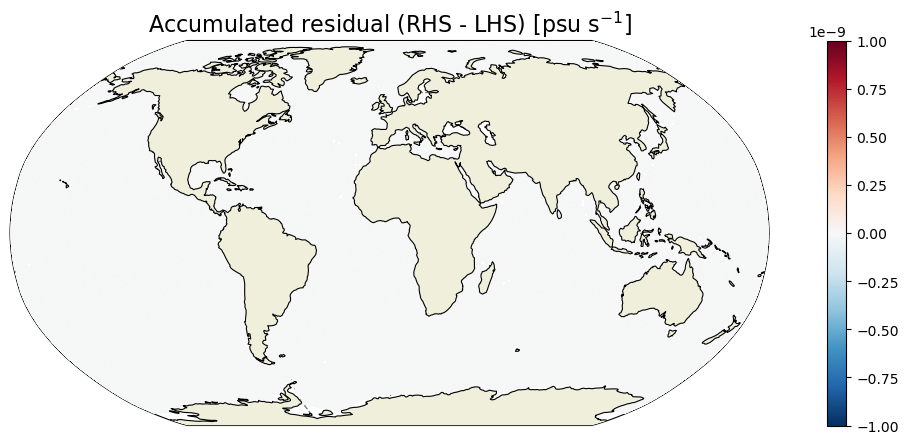

In [36]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, resSlt,
                              cmin=-1e-9, cmax=1e-9, show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Accumulated residual (RHS - LHS) [psu s$^{-1}$]', fontsize=16)
plt.show()

In [37]:
psutil.virtual_memory().available

3558690816

The above map confirms that the residual (summed over depth and time) is essentially zero everywhere, and the ECCOv4 salt budget can be closed to machine precision. 

### Salt budget: Spatial distributions

In [38]:
# In order to plot the budget terms in one figure, let's add them in a list
var = [G_total_Slt,'G_advection_Slt','G_diffusion_Slt',G_forcing_Slt]
varstrngs = [r'$G^{Slt}_{total}$',r'$G^{Slt}_{advection}$',r'$G^{Slt}_{diffusion}$',r'$G^{Slt}_{forcing}$']

In [39]:
# Set an index for the time (t) and depth (k) axis
t, k = 100, 0

#### Example maps at a particular time and depth level

Memory at time chunk [100, 101] : 3540619264
Memory at time chunk [100, 101] : 3647520768


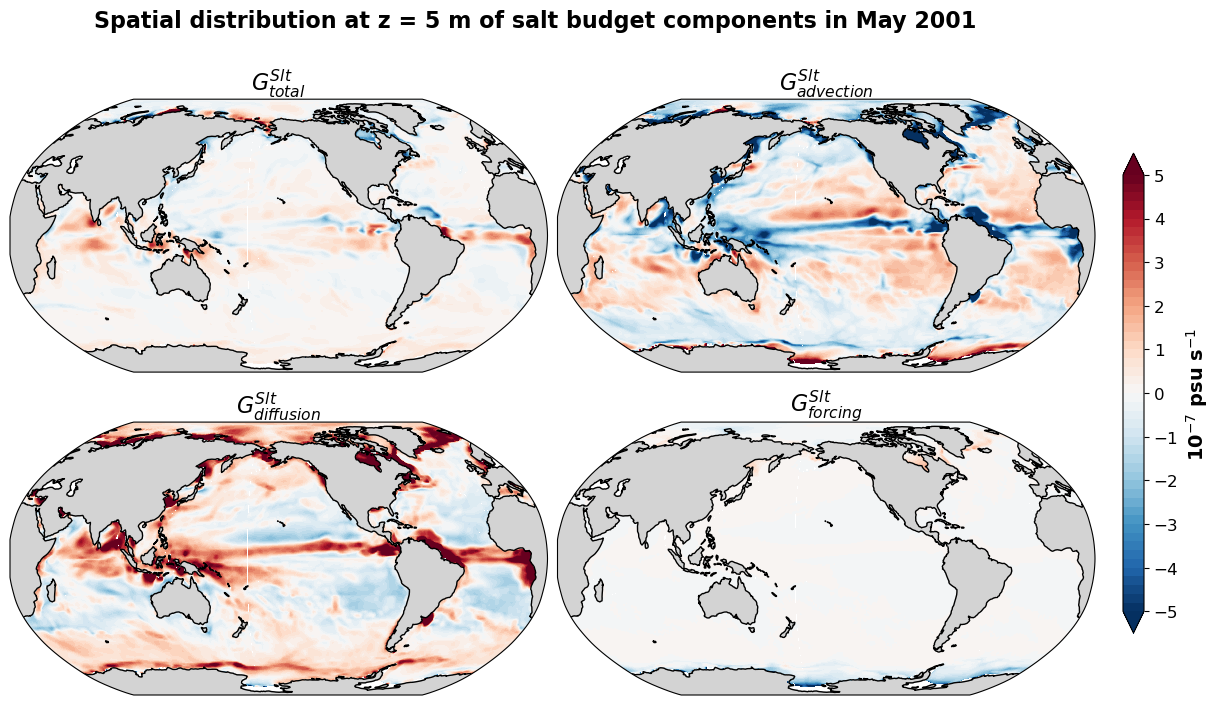

In [40]:
axes_class = (GeoAxes,dict(map_projection=cartopy.crs.Robinson(central_longitude=-159.5)))

fig = plt.figure(figsize=(14,8))
axgr = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(2, 2), axes_pad=(0.1 ,0.5), 
                share_all=True, label_mode='')

for i, ax in enumerate(axgr):
    if i == 1:
        var_to_plot = G_advection_Slt_compute(ds,ds_salt_flux_pickled,vol,time_isel=[t],k_isel=[k])
    elif i == 2:
        var_to_plot = G_diffusion_Slt_compute(ds,ds_salt_flux_pickled,vol,time_isel=[t],k_isel=[k])
    else:
        var_to_plot = var[i].isel(time=t,k=k)
    
    new_grid_lon, new_grid_lat,_,_, field_nearest_1deg =\
                    ecco.resample_to_latlon(ecco_grid.XC, ecco_grid.YC,
                                            var_to_plot,
                                            new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,
                                            new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,
                                            fill_value = np.NaN, mapping_method = 'nearest_neighbor',
                                            radius_of_influence = 120000)
    
    ax.coastlines(linewidth=1.0)
    ax.add_feature(cartopy.feature.LAND,color='lightgrey')
    ax.set_title(varstrngs[i],fontsize=16)
    p = ax.contourf(new_grid_lon, new_grid_lat, field_nearest_1deg*1e7, transform=cartopy.crs.PlateCarree(), 
                    vmin=-5, vmax=5, cmap='RdBu_r', levels=np.linspace(-5, 5, 51), extend='both')
    
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(p, cax=cax, orientation='vertical',ticks=np.linspace(-5, 5, 11))
cb.ax.tick_params(labelsize=12)
cb.set_label(r'10$^{-7}$ psu s$^{-1}$', fontsize=14, fontweight='bold')
fig.suptitle('Spatial distribution at z = %i m of salt budget components in '\
             %np.round(-ecco_grid.Z[k].values)+str(ds.time[t].dt.strftime("%b %Y").values),
             fontsize=16, fontweight='bold')

plt.show()

#### Time-mean distribution

Memory at time chunk [0, 11] : 3656331264
Memory at time chunk [11, 22] : 3657674752
Memory at time chunk [22, 33] : 3639164928
Memory at time chunk [33, 44] : 3588960256
Memory at time chunk [44, 55] : 3522916352
Memory at time chunk [55, 66] : 3522473984
Memory at time chunk [66, 77] : 3652370432
Memory at time chunk [77, 88] : 3645730816
Memory at time chunk [88, 99] : 3650240512
Memory at time chunk [99, 110] : 3650531328
Memory at time chunk [110, 121] : 3656450048
Memory at time chunk [121, 132] : 3641065472
Memory at time chunk [132, 143] : 3640733696
Memory at time chunk [143, 154] : 3641405440
Memory at time chunk [154, 165] : 3655106560
Memory at time chunk [165, 176] : 3635400704
Memory at time chunk [176, 187] : 3634950144
Memory at time chunk [187, 198] : 3639672832
Memory at time chunk [198, 209] : 3657039872
Memory at time chunk [209, 220] : 3646529536
Memory at time chunk [220, 231] : 3636383744
Memory at time chunk [231, 242] : 3644022784
Memory at time chunk [242, 253

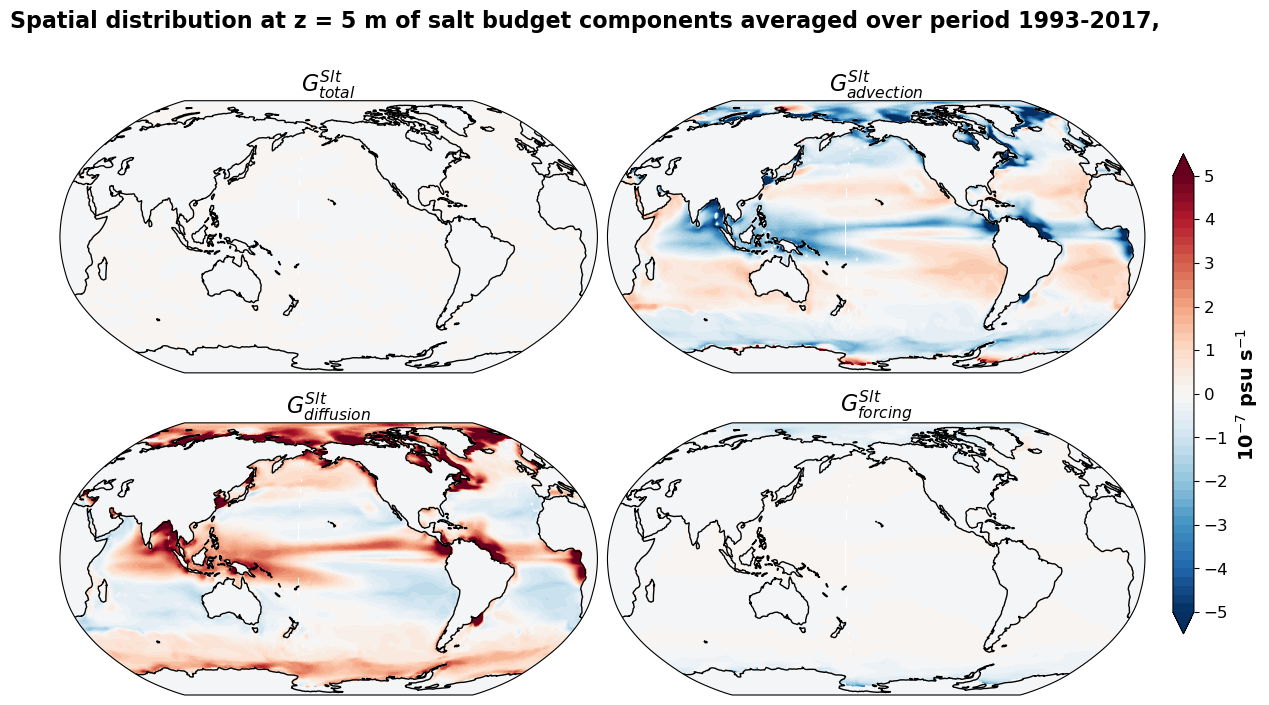

In [41]:
axes_class = (GeoAxes,dict(map_projection=cartopy.crs.Robinson(central_longitude=-159.5)))

fig = plt.figure(figsize=(14,8))
fig.suptitle('Spatial distribution at z = %i m of salt budget components averaged over period %i-%i,'\
             %(np.round(-ecco_grid.Z[k].values),year_start,year_end),
             fontsize=16, fontweight='bold')
axgr = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(2, 2), axes_pad=(0.1 ,0.5), 
                share_all=True, label_mode='')

for i, ax in enumerate(axgr):
    if i == 1:
        var_to_plot = monthly_tmean_aggregate(G_advection_Slt_compute,\
                                                  ds,ds_salt_flux_pickled,vol,time_month_weights,\
                                                  time_chunksize=time_chunksize,k_isel=[k])
    elif i == 2:
        var_to_plot = monthly_tmean_aggregate(G_diffusion_Slt_compute,\
                                                  ds,ds_salt_flux_pickled,vol,time_month_weights,\
                                                  time_chunksize=time_chunksize,k_isel=[k])
    else:
        var_to_plot = (var[i].isel(k=k)*time_month_weights).sum('time')
    
    new_grid_lon, new_grid_lat, _,_,field_nearest_1deg =\
                    ecco.resample_to_latlon(ecco_grid.XC, ecco_grid.YC,
                                            var_to_plot,
                                            new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,
                                            new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,
                                            fill_value = np.NaN, mapping_method = 'nearest_neighbor',
                                            radius_of_influence = 120000)
    
    ax.coastlines(linewidth=1.0)
    ax.add_feature(cartopy.feature.LAND,color='lightgrey')
    ax.set_title(varstrngs[i],fontsize=16)
    p = ax.contourf(new_grid_lon, new_grid_lat, field_nearest_1deg*1e7, transform=cartopy.crs.PlateCarree(), 
                    vmin=-5, vmax=5, cmap='RdBu_r', levels=np.linspace(-5, 5, 51), extend='both')
    
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(p, cax=cax, orientation='vertical',ticks=np.linspace(-5, 5, 11))
cb.ax.tick_params(labelsize=12)
cb.set_label(r'10$^{-7}$ psu s$^{-1}$', fontsize=14, fontweight='bold')
plt.show()

From the maps above, we can see that the balance in the salt budget is mostly between the advective and diffusive convergence, and the forcing term is only relevant close to the sea ice edge.

### Salt budget closure through time

#### Global average budget closure

In [42]:
# Take volume-weighted mean of these terms
tmp_a1 = (G_total_Slt*vol).sum(dim=('k','i','j','tile')).compute()/vol.sum()
# tmp_b = (G_advection_Slt*vol).sum(dim=('k','i','j','tile'))/vol.sum()
# tmp_c = (G_diffusion_Slt*vol).sum(dim=('k','i','j','tile'))/vol.sum()
# tmp_d = (G_forcing_Slt*vol).sum(dim=('k','i','j','tile'))/vol.sum()

tmp_b_vals = np.empty(tmp_a1.shape).astype('float32')
tmp_c_vals = np.empty(tmp_a1.shape).astype('float32')
for time_chunk in range(int(np.ceil(ds.sizes['time']/time_chunksize))):
    chunk_start = time_chunksize*time_chunk
    chunk_end = np.fmin(time_chunksize*(time_chunk+1),ds.sizes['time'])
    tmp_b_vals[chunk_start:chunk_end] = ((G_advection_Slt_compute(\
                                                    ds,ds_salt_flux_pickled,vol,time_isel=slice(chunk_start,chunk_end))*vol)\
                                                 .sum(dim=('k','i','j','tile'))/vol.sum())\
                                                 .compute().values
    tmp_c_vals[chunk_start:chunk_end] = ((G_diffusion_Slt_compute(\
                                                    ds,ds_salt_flux_pickled,vol,time_isel=slice(chunk_start,chunk_end))*vol)\
                                                 .sum(dim=('k','i','j','tile'))/vol.sum())\
                                                 .compute().values
tmp_b = xr.DataArray(tmp_b_vals,dims=tmp_a1.dims,coords=tmp_a1.coords)
tmp_c = xr.DataArray(tmp_c_vals,dims=tmp_a1.dims,coords=tmp_a1.coords)

tmp_d = (G_forcing_Slt*vol).sum(dim=('k','i','j','tile')).compute()/vol.sum()

# tmp_a2 = (rhs*vol).sum(dim=('k','i','j','tile'))/vol.sum()
# # save time by not re-computing G_advection_Slt, G_diffusion_Slt, G_forcing_Slt to compute rhs
tmp_a2 = tmp_b + tmp_c + tmp_d

TypeError: 'slice' object is not subscriptable

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))

plt.sca(axs[0,0])
tmp_a1.plot(color='k',lw=2)
tmp_a2.plot(color='grey')
axs[0,0].set_title(r'a. $G^{Slt}_{total}$ (black) / RHS (grey) [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[0,1])
tmp_b.plot(color='r')
axs[0,1].set_title(r'b. $G^{Slt}_{advection}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,0])
tmp_c.plot(color='orange')
axs[1,0].set_title(r'c. $G^{Slt}_{diffusion}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,1])
tmp_d.plot(color='b')
axs[1,1].set_title(r'd. $G^{Slt}_{forcing}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()
plt.subplots_adjust(hspace = .5, wspace=.2)
plt.suptitle('Global Salt Budget', fontsize=16)
plt.show()

The globally-averaged salt budget is driven by the forcing term, which mostly represents the input/output of salt from sea ice melting/freezing.

#### Local salt budget closure

In [ ]:
# Pick any set of indices (tile, k, j, i) corresponding to an ocean grid point
t,k,j,i = (12,0,87,16)
print(t,k,j,i)

In [ ]:
# compute vertical profiles at selected point and load into memory
G_total_Slt_atpt = G_total_Slt.isel(tile=t,j=j,i=i).compute()

# G_advection_Slt_atpt = G_advection_Slt.isel(tile=t,j=j,i=i).compute()
# G_diffusion_Slt_atpt = G_diffusion_Slt.isel(tile=t,j=j,i=i).compute()
adv_atpt_vals = np.empty(G_total_Slt_atpt.transpose('time','k').shape).astype('float32')
diff_atpt_vals = np.empty(G_total_Slt_atpt.transpose('time','k').shape).astype('float32')
for time_chunk in range(int(np.ceil(ds.sizes['time']/time_chunksize))):
    chunk_start = time_chunksize*time_chunk
    chunk_end = np.fmin(time_chunksize*(time_chunk+1),ds.sizes['time'])
    # use delayed computation to conserve memory
    # when using only a spatial subset
    adv_atpt_vals[chunk_start:chunk_end,:] = G_advection_Slt_compute(\
                                                    ds,ds_salt_flux_pickled,vol,time_isel=slice(chunk_start,chunk_end),\
                                                    delay_compute=True)\
                                                    .isel(tile=t,j=j,i=i).compute().values
    diff_atpt_vals[chunk_start:chunk_end,:] = G_diffusion_Slt_compute(\
                                                    ds,ds_salt_flux_pickled,vol,time_isel=slice(chunk_start,chunk_end),\
                                                    delay_compute=True)\
                                                    .isel(tile=t,j=j,i=i).compute().values
G_advection_Slt_atpt = xr.DataArray(adv_atpt_vals,dims=['time','k'],\
                                    coords=G_total_Slt_atpt.coords)
G_diffusion_Slt_atpt = xr.DataArray(diff_atpt_vals,dims=['time','k'],\
                                    coords=G_total_Slt_atpt.coords)

G_forcing_Slt_atpt = G_forcing_Slt.isel(tile=t,j=j,i=i).compute()

rhs_atpt = G_advection_Slt_atpt + G_diffusion_Slt_atpt + G_forcing_Slt_atpt

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))

plt.sca(axs[0,0])
G_total_Slt_atpt.isel(k=k).plot(color='k',lw=2)
rhs_atpt.isel(k=k).plot(color='grey')
axs[0,0].set_title(r'a. $G^{Slt}_{total}$ (black) / RHS (grey) [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[0,1])
G_advection_Slt_atpt.isel(k=k).plot(color='r')
axs[0,1].set_title(r'b. $G^{Slt}_{advection}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,0])
G_diffusion_Slt_atpt.isel(k=k).plot(color='orange')
axs[1,0].set_title(r'c. $G^{Slt}_{diffusion}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,1])
G_forcing_Slt_atpt.isel(k=k).plot(color='b')
axs[1,1].set_title(r'd. $G^{Slt}_{forcing}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()
plt.subplots_adjust(hspace = .5, wspace=.2)
plt.suptitle('Salt Budget at a specific grid point (tile = %i, k = %i, j = %i, i = %i)'%(t,k,j,i), fontsize=16)

plt.show()

The balance looks very different for the local salt budget of a specific grid point. We see much greater magnitudes, mostly in the advective and diffusive part. The forcing component is an order of magnitude smaller than $G^{Slt}_{advection}$ and $G^{Slt}_{diffusion}$ and only relevant when sea ice is melting/freezing.

### Vertical profiles of the salt budget terms

In [ ]:
fig = plt.subplots(1, 2, sharey=True, figsize=(12,7))

plt.subplot(1, 2, 1)
plt.plot((G_total_Slt_atpt*time_month_weights).sum('time'), ecco_grid.Z,
         lw=4, color='black', marker='.', label=r'$G^{Slt}_{total}$ (LHS)')
plt.plot((G_advection_Slt_atpt*time_month_weights).sum('time'), ecco_grid.Z, 
         lw=2, color='red', marker='.', label=r'$G^{Slt}_{advection}$')
plt.plot((G_diffusion_Slt_atpt*time_month_weights).sum('time'), ecco_grid.Z, 
         lw=2, color='orange', marker='.', label=r'$G^{Slt}_{diffusion}$')
plt.plot((G_forcing_Slt_atpt*time_month_weights).sum('time'), ecco_grid.Z, 
         lw=2, color='blue', marker='.', label=r'$G^{Slt}_{forcing}$')
plt.plot((rhs_atpt*time_month_weights).sum('time'), ecco_grid.Z, lw=1, color='grey', marker='.', label='RHS')
plt.xlabel(r'Tendency [psu s$^{-1}$]', fontsize=14)
plt.ylim([-200,0])
plt.ylabel('Depth (m)', fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='lower left', frameon=False, fontsize=12)

plt.subplot(1, 2, 2)
plt.plot((G_total_Slt_atpt*time_month_weights).sum('time'), ecco_grid.Z,
         lw=4, color='black', marker='.', label=r'$G^{Slt}_{total}$ (LHS)')
plt.plot((rhs_atpt*time_month_weights).sum('time'), ecco_grid.Z, lw=1, color='grey', marker='.', label='RHS')
plt.setp(plt.gca(), 'yticklabels',[])
plt.xlabel(r'Tendency [psu s$^{-1}$]', fontsize=14)
plt.ylim([-200,0])
plt.show()

The above examples illustrate that we can close the salt budget globally/spatially averaged, locally (for each grid point) at a specific time or averaged over time.

Given the nonlinear free surface condition, budgets for salt content (an extensive quantity) are not the same as budgets for salinity (an intensive quantity). The surface freshwater exchanges do not enter into the salt budget, since such fluxes do not affect the overall salt content, but rather make it more or less concentrated. However, a budget for salinity can be derived based on the conservation equations for salt and volume, and estimated using diagnostic model output. Such details are given in the section below.

## Evaluating the salinity budget
In this section, we demonstrate how to estimate the salinity budget using output from the ECCOv4 solution. Each term in the following salinity budget equation will be evaluated.

$$G^{Sln}_\textrm{total} = G^{Sln}_\textrm{advection} + G^{Sln}_\textrm{diffusion} + G^{Sln}_\textrm{forcing}$$

### Scale factor
Closing the salinity budget requires accurate estimates of volume changes for each grid cell. Thus, we need to explicitly calculate the scale factor ($s^*$) to be used in our calculations below.
$$s^* = 1 + \frac{\eta}{H}$$

This requires following model output:
- `Depth`: Ocean depth, $H$ (m)
- `ETAN`: Surface Height Anomaly, $\eta$ (m)

In [ ]:
psutil.virtual_memory().available

In [ ]:
list(locals().keys())[60:70]

In [ ]:
for varname in list(locals().keys())[60:]:
    if varname[0] != '_':
        del locals()[varname]
        print('Available memory after deleting',varname,':',psutil.virtual_memory().available)

In [ ]:
# Scale factor
rstarfac = ((ecco_grid.Depth + ecco_monthly_mean.ETAN)/ecco_grid.Depth)

### Total salinity tendency
We calculate the monthly-averaged time tendency of salinity by differencing monthly `SALT` snapshots. This operation includes dividing by the number of seconds between each snapshot.
$$G^{Sln}_\textrm{total} = \frac{\Delta S}{\Delta t}$$

In [ ]:
# Total tendency (psu/s)
SALT_diff = ds.SALT_snp.diff('time_snp')
SALT_diff = SALT_diff.rename({'time_snp':'time'})
del SALT_diff.time.attrs['c_grid_axis_shift']    # remove attribute from DataArray
SALT_diff = SALT_diff.assign_coords(time=ds.time)    # correct time coordinate values
G_total_Sln = SALT_diff/delta_t

### Advective salinity convergence
Based on the derivation in the Introduction section, the salinity budget requires terms from both the volume and salt budgets. For the advective convergence of salinity, we first need to derive the convergence of volume.

Relevant model output:

- `UVELMASS`: U Mass-Weighted Component of Velocity (m/s)

- `VVELMASS`: V Mass-Weighted Component of Velocity (m/s)

- `WVELMASS`: Vertical Mass-Weighted Component of Velocity (m/s)

> Note: `WVELMASS[k=0] == -oceFWflx/rho0`. If we don't zero out the top cell, we end up double counting the surface flux.

In [ ]:
# set top level of WVELMASS to zero
ds['WVELMASS'] = ds['WVELMASS'].where(ds.k_l>0,0.)

# Set fluxes on land to zero (instead of NaN)
ds['UVELMASS'] = ds['UVELMASS'].where(ecco_grid.hFacW.values > 0,0)
ds['VVELMASS'] = ds['VVELMASS'].where(ecco_grid.hFacS.values > 0,0)
ds['WVELMASS'] = ds['WVELMASS'].where(ecco_grid.hFacC.values > 0,0)


# transpose dimensions for xgcm if needed
ds['WVELMASS'] = ds.WVELMASS.transpose('time','tile','k_l','j','i')

# re-chunk arrays for better performance
ds['UVELMASS'] = ds['UVELMASS'].chunk({'time':1,'k':-1,'tile':-1,'j':-1,'i_g':-1})
ds['VVELMASS'] = ds['VVELMASS'].chunk({'time':1,'k':-1,'tile':-1,'j_g':-1,'i':-1})
ds['WVELMASS'] = ds['WVELMASS'].chunk({'time':1,'tile':-1,'k_l':-1,'j':-1,'i':-1})


# create pickled objects with pointers to original files
ds_vol_flux_pickled = pickle.dumps(ds_vol_flux)
ds_bolus_strmfcn_pickled = pickle.dumps(ds_bolus_strmfcn)
ds_salt_monthly_pickled = pickle.dumps(ds_salt_monthly)

# close datasets (to be reopened later using pickled objects)
ds_vol_flux.close()
ds_bolus_strmfcn.close()
ds_salt_monthly.close()

Advective convergence of salinity has two parts: the convergence of the advective salt flux (`adv_ConvS`), and the volume flux (`ConvV`). The function below computes both, and outputs the advective salinity convergence.

In [ ]:
### Original code to compute volume convergence is commented below
### (can use this if xgcm.diff_2d_vector is working properly
### and memory constraints allow)

# # Horizontal volume transports (m^3/s)
# u_transport = ds.UVELMASS * ecco_grid.dyG * ecco_grid.drF
# v_transport = ds.VVELMASS * ecco_grid.dxG * ecco_grid.drF

# # Set fluxes on land to zero (instead of NaN)
# u_transport = u_transport.where(ecco_grid.hFacW.values > 0,0)
# v_transport = v_transport.where(ecco_grid.hFacS.values > 0,0)

# uv_diff = grid.diff_2d_vector({'X' : u_transport, 'Y' : v_transport}, boundary = 'fill')

# # Convergence of the horizontal flow (m^3/s)
# hConvV = -(uv_diff['X'] + uv_diff['Y'])


# # Vertical volume transport (m^3/s)
# w_transport = ds.WVELMASS.where(ds.k_l>0,0.) * ecco_grid.rA

# # Set land values of flux to zero (instead of NaN)
# w_transport = w_transport.where(ecco_grid.hFacC.values > 0,0)

# # Convergence of the vertical flow (m^3/s)
# vConvV = grid.diff(w_transport, 'Z', boundary='fill')


# # Horizontal convergence of salinity (m^3/s)
# adv_hConvSln = (-ds.SALT*hConvV + adv_hConvS)/rstarfac

# # Vertical convergence of salinity (psu m^3/s)
# adv_vConvSln = (-ds.SALT*vConvV + adv_vConvS)/rstarfac


# # Total convergence of advective salinity flux (psu/s)
# G_advection_Sln = (adv_hConvSln + adv_vConvSln)/vol


### End of original code block

In [ ]:
def G_advection_Sln_compute(ds,ds_salt_flux_pickled,vol,time_isel=None,k_isel=None,\
                            ds_vol_flux_pickled=None,ds_salt_monthly_pickled=None,ecco_grid=None,\
                            delay_compute=False):
    """Computes advection tendency for given time and k indices (k indices must be continuous, without gaps)"""

    if isinstance(time_isel,type(None)):
        time_isel = np.arange(0,ds.sizes['time'])
    if isinstance(k_isel,type(None)):
        k_isel = np.arange(0,ds.sizes['k'])

    if len(k_isel) > 1:
        if (np.nanmin(np.diff(np.asarray(k_isel))) < 1) or (np.nanmax(np.diff(np.asarray(k_isel))) > 1):
            raise ValueError('k_isel is not monotonically increasing or not continuous')        

    
    # re-open source datasets
    ds_salt_flux = pickle.loads(ds_salt_flux_pickled)
    ds_vol_flux = pickle.loads(ds_vol_flux_pickled)
    ds_salt_monthly = pickle.loads(ds_salt_monthly_pickled)
        
    ## Compute horizontal convergence of salt (psu m^3/s)
    ADVx_SLT = ds.ADVx_SLT.isel(time=time_isel,k=k_isel)
    ADVy_SLT = ds.ADVy_SLT.isel(time=time_isel,k=k_isel)
    if not delay_compute:
        ADVx_SLT = ADVx_SLT.compute()
        ADVy_SLT = ADVy_SLT.compute()
    ADVxy_diff = diff_2d_flux_llc90({'X': ADVx_SLT,\
                                     'Y': ADVy_SLT}) 
    
    adv_hConvS = (-(ADVxy_diff['X'] + ADVxy_diff['Y']))
    if not delay_compute:
        adv_hConvS = adv_hConvS.compute()
    # transpose dimensions
    adv_hConvS = adv_hConvS.transpose('time','tile','k','j','i')    
    # restore time coordinate to DataArray if needed (can be lost in xgcm.diff_2d_vector operation)
    adv_hConvS = adv_hConvS.assign_coords({'time':ds.time[time_isel].data})

    del ADVx_SLT
    del ADVy_SLT
    del ADVxy_diff

    ## Compute horizontal convergence of volume (m^3/s)
    u_transport = (ds.UVELMASS * ecco_grid.dyG * ecco_grid.drF).isel(time=time_isel,k=k_isel)
    v_transport = (ds.VVELMASS * ecco_grid.dxG * ecco_grid.drF).isel(time=time_isel,k=k_isel)
    if not delay_compute:
        u_transport = u_transport.compute()
        v_transport = v_transport.compute()
    uv_diff = diff_2d_flux_llc90({'X': u_transport,\
                                  'Y': v_transport})
    
    hConvV = -(uv_diff['X'] + uv_diff['Y'])
    if not delay_compute:
        hConvV = hConvV.compute()
    # transpose dimensions if needed
    hConvV = hConvV.transpose('time','tile','k','j','i')
    
    del u_transport
    del v_transport
    del uv_diff
    
    ## Convergence of vertical advection (psu/s)
    adv_vConvS = diff_k_l_to_k(ds,'ADVr_SLT',time_isel,k_isel,\
                               ds_source=ds_salt_flux,ds_source_pickled=ds_salt_flux_pickled,\
                               delay_compute=delay_compute)
    if not delay_compute:
        adv_vConvS = adv_vConvS.compute()
    # restore time coordinate to DataArray if needed (can be lost in xgcm.diff_2d_vector operation)
    adv_vConvS = adv_vConvS.assign_coords({'time':ds.time[time_isel].data})

    ## Compute vertical convergence of volume (m^3/s)
    ds['w_transport'] = ds['WVELMASS']*ecco_grid.rA
    vConvV = diff_k_l_to_k(ds,'w_transport',time_isel,k_isel,\
                           ds_source=ds_vol_flux,ds_source_pickled=ds_vol_flux_pickled,\
                           delay_compute=delay_compute)
    if not delay_compute:
        vConvV = vConvV.compute()

    # flush the cache
    ds_salt_flux.close()
    ds_salt_flux = pickle.loads(ds_salt_flux_pickled)
    ds_vol_flux.close()
    ds_vol_flux = pickle.loads(ds_vol_flux_pickled)
    
    del ds['w_transport']

    # Horizontal convergence of salinity (m^3/s)
    
    SALT = ds.SALT.isel(time=time_isel,k=k_isel).compute()
    # flush the cache
    ds_salt_monthly.close()
    ds_salt_monthly = pickle.loads(ds_salt_monthly_pickled)
    
    adv_hConvSln = ((-SALT*hConvV) + adv_hConvS)/rstarfac

    # Vertical convergence of salinity (psu m^3/s)
    adv_vConvSln = ((-SALT*vConvV) + adv_vConvS)/rstarfac

    # Total convergence of advective salinity flux (psu/s)
    G_advection_Sln = (adv_hConvSln + adv_vConvSln)/vol
        
    
    del adv_hConvS
    del hConvV
    del adv_vConvS
    del vConvV
    del adv_hConvSln
    del adv_vConvSln

    # close the original datasets where the fluxes were loaded from the source files
    ds_salt_flux.close()
    ds_vol_flux.close()
    ds_salt_monthly.close()
    
    return G_advection_Sln

### Diffusive salinity convergence
The diffusive flux of salinity is pretty much the same as for salt. The only step is dividing the convergence of salt diffusion by the scale factor.

In [ ]:
### Original code to compute volume convergence is commented below
### (can use this if xgcm.diff_2d_vector is working properly
### and memory constraints allow)

# # Horizontal convergence
# dif_hConvSln = dif_hConvS/rstarfac

# # Vertical convergence
# dif_vConvSln = dif_vConvS/rstarfac

# # Sum horizontal and vertical convergences and divide by volume (psu/s)
# G_diffusion_Sln = (dif_hConvSln + dif_vConvSln)/vol

### End of original code block


def G_diffusion_Sln_compute(ds,ds_salt_flux_pickled,vol,time_isel=None,k_isel=None,rstarfac=None,\
                            delay_compute=False):
    G_diffusion_Slt = G_diffusion_Slt_compute(ds,ds_salt_flux_pickled,vol,time_isel=None,k_isel=None,\
                                              delay_compute=delay_compute)
    G_diffusion_Sln = (G_diffusion_Slt/rstarfac.isel(time=time_isel))
    if not delay_compute:
        G_diffusion_Sln = G_diffusion_Sln.compute()

    return G_diffusion_Sln

### Salinity forcing
The forcing term is comprised of both salt flux (`forcS`) and volume (i.e., surface freshwater) fluxes (`forcV`).
We now require monthly mean salinity `SALT` to convert `forcV` to appropriate units.

#### Volume forcing
- `oceFWflx`: net surface Fresh-Water flux into the ocean (kg/m^2/s)

In [ ]:
# Load monthly averaged freshwater flux and add vertical coordinate
oceFWflx = ds.oceFWflx.assign_coords(k=0).expand_dims('k')

# Sea surface forcing on volume (1/s)
forcV = xr.concat([(oceFWflx/rhoconst)/(ecco_grid.hFacC*ecco_grid.drF), 
                   xr.zeros_like((oceFWflx[0]/rhoconst)/(ecco_grid.hFacC*ecco_grid.drF).isel(k=slice(1,None)))], 
                  dim='k')

In [ ]:
# Sea surface forcing for salinity (psu/s)
G_forcing_Sln = (-ds.SALT*forcV + G_forcing_Slt)/rstarfac

### Salinity budget: Map of residual

In [ ]:
mem_avail = psutil.virtual_memory().available
print('Available memory:',mem_avail/(10**9),'GB')

# chunk size to use when computing time mean with monthly_tmean_aggregate (not the same as dask chunksize)
target_array_size = mem_avail/20
full_array_size = 4*(ds['SALT'].size)
array_size_per_time = full_array_size/ds.sizes['time']
time_chunksize = int(np.round(target_array_size/array_size_per_time))
time_chunksize = np.fmin(np.fmax(time_chunksize,1),ds.sizes['time'])
print('Using time_chunksize =',time_chunksize)

In [ ]:
# individual month weights
time_month_weights = delta_t/delta_t.sum()

G_advection_Sln_tmean = monthly_tmean_aggregate(G_advection_Sln_compute,\
                                                  ds,ds_salt_flux_pickled,vol,time_month_weights,\
                                                  time_chunksize=time_chunksize,\
                                                  dict_more_kwargs={'ds_vol_flux_pickled':ds_vol_flux_pickled,\
                                                                    'ds_salt_monthly_pickled':ds_salt_monthly_pickled,\
                                                                    'ecco_grid':ecco_grid})
G_diffusion_Sln_tmean = monthly_tmean_aggregate(G_diffusion_Sln_compute,\
                                                  ds,ds_salt_flux_pickled,vol,time_month_weights,\
                                                  time_chunksize=time_chunksize,\
                                                  dict_more_kwargs={'rstarfac':rstarfac})

# Total convergence (psu/s)
ConvSln_tmean = G_advection_Sln_tmean.compute() + G_diffusion_Sln_tmean.compute()

# Sum of terms in RHS of equation (psu/s)
rhs_Sln_tmean = ConvSln_tmean + ((G_forcing_Sln*time_month_weights).sum(dim='time').compute())

# total tendency time mean
G_total_Sln_tmean = (G_total_Sln*time_month_weights).sum(dim='time').compute()

In [ ]:
# Accumulated residual
resSln = ((((rhs_Sln_tmean-G_total_Sln_tmean)*vol).sum(dim='k'))/vol.sum(dim='k')).compute()

In [ ]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, resSln,
                              cmin=-2e-8, cmax=2e-8, show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Accumulated residual (RHS - LHS) [psu s$^{-1}$]', fontsize=16)
plt.show()

The residual in the salinity budget are more extensive compared to the salt budget. Here errors occur that are mostly found in the continental shelves and high latitudes. However, given that the above map shows the accumulated residual, the errors are very small compared to the salinity tendencies' overall range of values.

### Salinity budget: Spatial distributions

In [ ]:
# In order to plot the budget terms in one figure, let's add them in a list
var = [G_total_Sln,G_advection_Sln,G_diffusion_Sln,G_forcing_Sln]
varstrngs = [r'$G^{Sln}_{total}$',r'$G^{Sln}_{advection}$',r'$G^{Sln}_{diffusion}$',r'$G^{Sln}_{forcing}$']

In [ ]:
# Set an index for the time (t) and depth (k) axis
t, k = 100, 0

#### Example maps at a particular time and depth level

In [ ]:
axes_class = (GeoAxes,dict(map_projection=cartopy.crs.Robinson(central_longitude=-159.5)))

fig = plt.figure(figsize=(14,8))
fig.suptitle('Spatial distribution at z = %i m of salinity budget components in '\
             %np.round(-ecco_grid.Z[k].values)+str(ds.time[t].dt.strftime("%b %Y").values),
             fontsize=16, fontweight='bold')
axgr = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(2, 2), axes_pad=(0.1 ,0.5), 
                share_all=True, label_mode='')

for i, ax in enumerate(axgr):
    if i == 1:
        var_to_plot = G_advection_Sln_compute(ds,ds_salt_flux_pickled,vol,time_isel=[t],k_isel=[k],\
                                              ds_vol_flux_pickled=ds_vol_flux_pickled,\
                                              ecco_grid=ecco_grid)
    elif i == 2:
        var_to_plot = G_diffusion_Sln_compute(ds,ds_salt_flux_pickled,vol,time_isel=[t],k_isel=[k],\
                                              rstarfac=rstarfac)
    else:
        var_to_plot = var[i].isel(time=t,k=k)
    
    new_grid_lon, new_grid_lat,_,_, field_nearest_1deg =\
                    ecco.resample_to_latlon(ecco_grid.XC, ecco_grid.YC,
                                            var_to_plot,
                                            new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,
                                            new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,
                                            fill_value = np.NaN, mapping_method = 'nearest_neighbor',
                                            radius_of_influence = 120000)
    
    ax.coastlines(linewidth=1.0,zorder=2)
    ax.add_feature(cartopy.feature.LAND,color='lightgrey',zorder=1)
    ax.set_title(varstrngs[i],fontsize=16)
    p = ax.contourf(new_grid_lon, new_grid_lat, field_nearest_1deg*1e6, transform=cartopy.crs.PlateCarree(), 
                    vmin=-1, vmax=1, cmap='RdBu_r', levels=np.linspace(-1, 1, 51), extend='both',zorder=0)
    
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(p, cax=cax, orientation='vertical',ticks=np.linspace(-1, 1, 11))
cb.ax.tick_params(labelsize=12)
cb.set_label(r'10$^{-6}$ psu s$^{-1}$', fontsize=14, fontweight='bold')

plt.show()

#### Time-mean distribution

In [ ]:
axes_class = (GeoAxes,dict(map_projection=cartopy.crs.Robinson(central_longitude=-159.5)))

fig = plt.figure(figsize=(14,8))
fig.suptitle('Spatial distribution at z = %i m of salinity budget components averaged over period %i-%i,'\
             %(np.round(-ecco_grid.Z[k].values),year_start,year_end),
             fontsize=16, fontweight='bold')
axgr = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(2, 2), axes_pad=(0.1 ,0.5), 
                share_all=True, label_mode='')

for i, ax in enumerate(axgr):
    if i == 1:
        var_to_plot = monthly_tmean_aggregate(G_advection_Sln_compute,\
                                                  ds,ds_salt_flux_pickled,vol,time_month_weights,\
                                                  time_chunksize=time_chunksize,k_isel=[k],\
                                                  dict_more_kwargs={'ds_vol_flux_pickled':ds_vol_flux_pickled,\
                                                                    'ds_salt_monthly_pickled':ds_salt_monthly_pickled,\
                                                                    'ecco_grid':ecco_grid})
    elif i == 2:
        var_to_plot = monthly_tmean_aggregate(G_diffusion_Sln_compute,\
                                                  ds,ds_salt_flux_pickled,vol,time_month_weights,\
                                                  time_chunksize=time_chunksize,k_isel=[k],\
                                                  dict_more_kwargs={'rstarfac':rstarfac})
    else:
        var_to_plot = (var[i].isel(k=k)*time_month_weights).sum('time')
    
    new_grid_lon, new_grid_lat,_,_, field_nearest_1deg =\
                    ecco.resample_to_latlon(ecco_grid.XC, ecco_grid.YC,
                                            var_to_plot,
                                            new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,
                                            new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,
                                            fill_value = np.NaN, mapping_method = 'nearest_neighbor',
                                            radius_of_influence = 120000)
    
    ax.coastlines(linewidth=1.0,zorder=2)
    ax.add_feature(cartopy.feature.LAND,color='lightgrey',zorder=1)
    ax.set_title(varstrngs[i],fontsize=16)
    p = ax.contourf(new_grid_lon, new_grid_lat, field_nearest_1deg*1e7, transform=cartopy.crs.PlateCarree(), 
                    vmin=-5, vmax=5, cmap='RdBu_r', levels=np.linspace(-5, 5, 51), extend='both',zorder=0)
    
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(p, cax=cax, orientation='vertical',ticks=np.linspace(-5, 5, 11))
cb.ax.tick_params(labelsize=12)
cb.set_label(r'10$^{-6}$ psu s$^{-1}$', fontsize=14, fontweight='bold')
plt.show()

Unlike with the salt budget, we now see a clear spatial pattern in the forcing term, which resembles surface freshwater flux.

### Salinity budget closure through time
This section illustrates that we can close the salinity budget globally and locally (i.e., at any given grid point).

#### Global average budget closure

In [ ]:
# Take volume-weighted mean of these terms
tmp_a1 = (G_total_Sln*vol).sum(dim=('k','i','j','tile')).compute()/vol.sum()
# tmp_b = (G_advection_Sln*vol).sum(dim=('k','i','j','tile'))/vol.sum()
# tmp_c = (G_diffusion_Sln*vol).sum(dim=('k','i','j','tile'))/vol.sum()
# tmp_d = (G_forcing_Sln*vol).sum(dim=('k','i','j','tile'))/vol.sum()

tmp_b_vals = np.empty(tmp_a1.shape).astype('float32')
tmp_c_vals = np.empty(tmp_a1.shape).astype('float32')
for time_chunk in range(int(np.ceil(ds.sizes['time']/time_chunksize))):
    chunk_start = time_chunksize*time_chunk
    chunk_end = np.fmin(time_chunksize*(time_chunk+1),ds.sizes['time'])
    tmp_b_vals[chunk_start:chunk_end] = ((G_advection_Sln_compute(\
                                                      ds,ds_salt_flux_pickled,vol,time_isel=slice(chunk_start,chunk_end),\
                                                      ds_vol_flux_pickled=ds_vol_flux_pickled,\
                                                      ecco_grid=ecco_grid)*vol)\
                                                    .sum(dim=('k','i','j','tile'))/vol.sum())\
                                                    .compute().values
    tmp_c_vals[chunk_start:chunk_end] = ((G_diffusion_Sln_compute(\
                                                        ds,ds_salt_flux_pickled,vol,time_isel=slice(chunk_start,chunk_end),\
                                                        rstarfac=rstarfac)*vol)\
                                                    .sum(dim=('k','i','j','tile'))/vol.sum())\
                                                    .compute().values
tmp_b = xr.DataArray(tmp_b_vals,dims=tmp_a1.dims,coords=tmp_a1.coords)
tmp_c = xr.DataArray(tmp_c_vals,dims=tmp_a1.dims,coords=tmp_a1.coords)

tmp_d = (G_forcing_Sln*vol).sum(dim=('k','i','j','tile')).compute()/vol.sum()

# tmp_a2 = (rhs*vol).sum(dim=('k','i','j','tile'))/vol.sum()
# # save time by not re-computing G_advection_Sln, G_diffusion_Sln, G_forcing_Sln to compute rhs
tmp_a2 = tmp_b + tmp_c + tmp_d

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))

plt.sca(axs[0,0])
tmp_a1.plot(color='k',lw=2)
tmp_a2.plot(color='grey')
axs[0,0].set_title(r'a. $G^{Sln}_{total}$ (black) / RHS (grey) [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[0,1])
tmp_b.plot(color='r')
axs[0,1].set_title(r'b. $G^{Sln}_{advection}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,0])
tmp_c.plot(color='orange')
axs[1,0].set_title(r'c. $G^{Sln}_{diffusion}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,1])
tmp_d.plot(color='b')
axs[1,1].set_title(r'd. $G^{Sln}_{forcing}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()
plt.subplots_adjust(hspace = .5, wspace=.2)
plt.suptitle('Global Salinity Budget', fontsize=16)
plt.show()

#### Local salinity budget closure

In [ ]:
# Pick any set of indices (tile, k, j, i) corresponding to an ocean grid point
t,k,j,i = (12,0,87,16)
print(t,k,j,i)

# compute vertical profiles at selected point and load into memory
G_total_Sln_atpt = G_total_Sln.isel(tile=t,j=j,i=i).compute()

# G_advection_Sln_atpt = G_advection_Sln.isel(tile=t,j=j,i=i).compute()
# G_diffusion_Sln_atpt = G_diffusion_Sln.isel(tile=t,j=j,i=i).compute()

adv_atpt_vals = np.empty(G_total_Slt_atpt.transpose('time','k').shape).astype('float32')
diff_atpt_vals = np.empty(G_total_Slt_atpt.transpose('time','k').shape).astype('float32')
for time_chunk in range(int(np.ceil(ds.sizes['time']/time_chunksize))):
    chunk_start = time_chunksize*time_chunk
    chunk_end = np.fmin(time_chunksize*(time_chunk+1),ds.sizes['time'])
    adv_atpt_vals[chunk_start:chunk_end,:] = G_advection_Slt_compute(\
                                                    ds,ds_salt_flux_pickled,vol,\
                                                    ds_vol_flux_pickled=ds_vol_flux_pickled,\
                                                    ecco_grid=ecco_grid,time_isel=slice(chunk_start,chunk_end),\
                                                    delay_compute=True).isel(tile=t,j=j,i=i).compute().values
    diff_atpt_vals[chunk_start:chunk_end,:] = G_diffusion_Slt_compute(\
                                                    ds,ds_salt_flux_pickled,vol,\
                                                    rstarfac=rstarfac,time_isel=slice(chunk_start,chunk_end),\
                                                    delay_compute=True).isel(tile=t,j=j,i=i).compute().values
G_advection_Sln_atpt = xr.DataArray(adv_atpt_vals,dims=['time','k'],\
                                    coords=G_total_Slt_atpt.transpose('time','k').coords)
G_diffusion_Sln_atpt = xr.DataArray(diff_atpt_vals,dims=['time','k'],\
                                    coords=G_total_Slt_atpt.transpose('time','k').coords)

G_forcing_Sln_atpt = G_forcing_Sln.isel(tile=t,j=j,i=i).compute()

rhs_Sln_atpt = G_advection_Sln_atpt + G_diffusion_Sln_atpt + G_forcing_Sln_atpt

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))

plt.sca(axs[0,0])
G_total_Sln_atpt.isel(k=k).plot(color='k',lw=2)
rhs_Sln_atpt.isel(k=k).plot(color='grey')
axs[0,0].set_title(r'a. $G^{Sln}_{total}$ (black) / RHS (grey) [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[0,1])
G_advection_Sln_atpt.isel(k=k).plot(color='r')
axs[0,1].set_title(r'b. $G^{Sln}_{advection}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,0])
G_diffusion_Sln_atpt.isel(k=k).plot(color='orange')
axs[1,0].set_title(r'c. $G^{Sln}_{diffusion}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,1])
G_forcing_Sln_atpt.isel(k=k).plot(color='b')
axs[1,1].set_title(r'd. $G^{Sln}_{forcing}$ [psu s$^{-1}$]', fontsize=12)
plt.grid()
plt.subplots_adjust(hspace = .5, wspace=.2)
plt.suptitle('Salinity budget at a specific grid point (tile = %i, k = %i, j = %i, i = %i)'%(t,k,j,i), fontsize=16)

plt.show()

### Vertical profiles of the salinity budget terms

This section illustrates the balance in the salinity budget along the depth axis.

In [ ]:
fig = plt.subplots(1, 2, sharey=True, figsize=(12,7))

plt.subplot(1, 2, 1)
plt.plot((G_total_Sln_atpt*time_month_weights).sum('time'), ecco_grid.Z,
         lw=4, color='black', marker='.', label=r'$G^{Sln}_{total}$ (LHS)')

plt.plot((G_advection_Sln_atpt*time_month_weights).sum('time'), ecco_grid.Z, 
         lw=2, color='red', marker='.', label=r'$G^{Sln}_{advection}$')

plt.plot((G_diffusion_Sln_atpt*time_month_weights).sum('time'), ecco_grid.Z, 
         lw=2, color='orange', marker='.', label=r'$G^{Sln}_{diffusion}$')

plt.plot((G_forcing_Sln_atpt*time_month_weights).sum('time'), ecco_grid.Z, 
         lw=2, color='blue', marker='.', label=r'$G^{Sln}_{forcing}$')
plt.plot((rhs_Sln_atpt*time_month_weights).sum('time'), ecco_grid.Z, lw=1, color='grey', marker='.', label='RHS')
plt.xlabel(r'Tendency [psu s$^{-1}$]', fontsize=14)
plt.ylim([-200,0])
plt.ylabel('Depth (m)', fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='lower left', frameon=False, fontsize=12)

plt.subplot(1, 2, 2)
plt.plot((G_total_Sln_atpt*time_month_weights).sum('time'), ecco_grid.Z,
         lw=4, color='black', marker='.', label=r'$G^{Sln}_{total}$ (LHS)')
plt.plot((rhs_Sln_atpt*time_month_weights).sum('time'), ecco_grid.Z, lw=1, color='grey', marker='.', label='RHS')
plt.setp(plt.gca(), 'yticklabels',[])
plt.xlabel(r'Tendency [psu s$^{-1}$]', fontsize=14)
plt.ylim([-200,0])
plt.show()

## Evaluating the freshwater budget 

Fresh water is defined as:

$fw = \frac{S_{ref} - S}{S_{ref}},$

where $S$ is salinity, $S_{ref}$ is a reference value.

As with the salt and a salinity budget we will evaluate each term in the freshwater budget. 

$G^{fw}_\textrm{total} = G^{fw}_\textrm{advection} + G^{fw}_\textrm{diffusion} + G^{fw}_\textrm{forcing}$

Each term is largely analagous to the salinity budget (including the scale factor $s^*$ to account for volume changes), except that we must calculate $G^{fw}_\textrm{diffusion}$ as the residual of the other terms. We will then compare with $G^{Sln}_\textrm{diffusion}$.

In [ ]:
# Reference salinity
Sref = 35.0

### Total freshwater tendency

As with salinity, we calculated the monthly-averaged time tendancy of freshwater by differencing monthly snapshots.

In [ ]:
f = (Sref - ds.SALT_snp)/Sref

# Total freshwater tendency (m^3/s)
f_diff = f.diff('time_snp')
f_diff = f_diff.rename({'time_snp':'time'})
del f_diff.time.attrs['c_grid_axis_shift']    # remove attribute from DataArray
f_diff = f_diff.assign_coords(time=ds.time)    # correct time coordinate values
G_total_Fw = f_diff*vol/delta_t

### Advective flux of freshwater

Advective fluxes of freshwater are calculated offline using salinity and velocity fields to calculate the volume convergence of freshwater:

$$
\mathbf{\mathcal{F}_{adv}} = \iint_A\mathbf{u}_{res} \cdot \left(\frac{S_{ref} - S}{S_{ref}}\right)dA
$$

$u_{res}$ is the residual mean velocity field, which contains both the resolved (Eulerian), as well as the Gent-McWilliams bolus velocity (i.e., the parameterization of unresolved eddy effects).

#### GM Bolus Velocity

In [ ]:
# Set values on land to zero (instead of NaN)
ds['GM_PsiX'] = ds.GM_PsiX.where(ecco_grid.hFacW.values > 0,0)
ds['GM_PsiY'] = ds.GM_PsiY.where(ecco_grid.hFacS.values > 0,0)

# create pickled object with pointers to original files
ds_bolus_strmfcn_pickled = pickle.dumps(ds_bolus_strmfcn)

# close dataset (to be reopened later using pickled object)
ds_bolus_strmfcn.close()


### Original code block
### (can be used if xgcm is working properly
###  and user has sufficient memory)

# UVELSTAR = grid.diff(ds.GM_PsiX, 'Z', boundary='fill')/ecco_grid.drF
# VVELSTAR = grid.diff(ds.GM_PsiY, 'Z', boundary='fill')/ecco_grid.drF

# GM_PsiXY_diff = grid.diff_2d_vector({'X' : ds.GM_PsiX*ecco_grid.dyG, 
#                                      'Y' : ds.GM_PsiY*ecco_grid.dxG}, boundary = 'fill')
# WVELSTAR = (GM_PsiXY_diff['X'] + GM_PsiXY_diff['Y'])/ecco_grid.rA

### End original code block


def bolus_vel_compute(ds,ds_bolus_strmfcn_pickled,ecco_grid,time_isel=None,k_isel=None,\
                      delay_compute=False):
    """
    Computes bolus velocity for given time and k indices 
    (k indices must be continuous, without gaps)
    """

    if isinstance(time_isel,type(None)):
        time_isel = np.arange(0,ds.sizes['time'])
    if isinstance(k_isel,type(None)):
        k_isel = np.arange(0,ds.sizes['k'])

    if len(k_isel) > 1:
        if (np.nanmin(np.diff(np.asarray(k_isel))) < 1) or (np.nanmax(np.diff(np.asarray(k_isel))) > 1):
            raise ValueError('k_isel is not monotonically increasing or not continuous')

    # re-open source dataset
    ds_bolus_strmfcn = pickle.loads(ds_bolus_strmfcn_pickled)
    
    UVELSTAR = (diff_k_l_to_k(ds,'GM_PsiX',time_isel,k_isel,\
                              delay_compute=delay_compute)/ecco_grid.drF)
    VVELSTAR = (diff_k_l_to_k(ds,'GM_PsiY',time_isel,k_isel,\
                              delay_compute=delay_compute)/ecco_grid.drF)
    
    GM_PsiXY_diff = diff_2d_flux_llc90({'X' : ds.GM_PsiX*ecco_grid.dyG, 
                                        'Y' : ds.GM_PsiY*ecco_grid.dxG})
    WVELSTAR = ((GM_PsiXY_diff['X'] + GM_PsiXY_diff['Y'])/ecco_grid.rA)
    
    if not delay_compute:
        UVELSTAR = UVELSTAR.compute()
        VVELSTAR = VVELSTAR.compute()
        WVELSTAR = WVELSTAR.compute()
    # flush out cache
    ds_bolus_strmfcn.close()
    ds_bolus_strmfcn = pickle.loads(ds_bolus_strmfcn_pickled)

    del GM_PsiXY_diff
    ds_bolus_strmfcn.close()

    return UVELSTAR,VVELSTAR,WVELSTAR

#### Calculate advective freshwater flux

As with the salinity budget, we zero out the top cell of `WVELMASS` to avoid double counting the surface flux

In [ ]:
### Original code block
### (can be used if xgcm is working properly
###  and user has sufficient memory)

# SALT_at_u = grid.interp(ds.SALT, 'X', boundary='extend')
# SALT_at_v = grid.interp(ds.SALT, 'Y', boundary='extend')
# SALT_at_w = grid.interp(ds.SALT, 'Z', boundary='extend')

# # Freshwater advective (Eulerian+Bolus) fluxes (m^3/s)
# ADVx_FW = (ds.UVELMASS+UVELSTAR)*ecco_grid.dyG*ecco_grid.drF*(Sref-SALT_at_u)/Sref
# ADVy_FW = (ds.VVELMASS+VVELSTAR)*ecco_grid.dxG*ecco_grid.drF*(Sref-SALT_at_v)/Sref
# ADVr_FW = (ds.WVELMASS.where(ds.k_l>0).fillna(0.)+WVELSTAR)*ecco_grid.rA*(Sref-SALT_at_w)/Sref

# # set fluxes on land to zero (instead of NaN)
# ADVx_FW = ADVx_FW.where(ecco_grid.hFacW.values > 0,0)
# ADVy_FW = ADVy_FW.where(ecco_grid.hFacS.values > 0,0)
# ADVr_FW = ADVr_FW.where(ecco_grid.hFacC.values > 0,0)

# ADVxy_diff = grid.diff_2d_vector({'X' : ADVx_FW, 'Y' : ADVy_FW}, boundary = 'fill')

# # Convergence of horizontal advection (m^3/s)
# adv_hConvFw = (-(ADVxy_diff['X'] + ADVxy_diff['Y']))

# # Convergence of vertical advection (m^3/s)
# adv_vConvFw = grid.diff(ADVr_FW, 'Z', boundary='fill')

# # Sum horizontal and vertical convergences (m^3/s)
# G_advection_Fw = (adv_hConvFw + adv_vConvFw)/rstarfac

### End original code block


def interp_llc90(var,axis):
    """
    A function that interpolates variables on the llc90 grid.
    Can be used in place of xgcm's diff for interpolations.
    """
    
    if axis == 'X':
        
        # array padding
        
        var_padded = var.pad(pad_width={'i':(1,0)},mode='constant',constant_values=np.nan)
        
        if not isinstance(var_padded.data,np.ndarray):
            var_padded = var_padded.chunk({'i':u_flux.sizes['i']+1})
    
        for tile in range(0,3):
            var_padded = da_replace_at_indices(var_padded,{'tile':str(tile),'i':'0'},\
                                                  var.isel(tile=12-tile,j=-1,i=slice(None,None,-1)).data)
        for tile in range(3,6):
            var_padded = da_replace_at_indices(var_padded,{'tile':str(tile),'i':'0'},\
                                                  var.isel(tile=tile-3,i=-1).data)
        var_padded = da_replace_at_indices(var_padded,{'tile':'6','i':'0'},\
                                              var.isel(tile=2,j=-1,i=slice(None,None,-1)).data)
        for tile in range(7,10):
            var_padded = da_replace_at_indices(var_padded,{'tile':str(tile),'i':'0'},\
                                                  var.isel(tile=tile-1,i=-1).data)
        var_padded = da_replace_at_indices(var_padded,{'tile':'10','i':'0'},\
                                              var.isel(tile=6,j=-1,i=slice(None,None,-1)).data)
        for tile in range(11,13):
            var_padded = da_replace_at_indices(var_padded,{'tile':str(tile),'i':'0'},\
                                                  var.isel(tile=tile-1,i=-1).data)

        # interpolate padded array
        var_interp = xr.DataArray((var_padded.isel(i=slice(None,-1,1)) + var_padded.isel(i=slice(1,None,1))).values/2,\
                                  dims=var.dims,coords=var.coords)
        var_interp = var_interp.rename({'i':'i_g'})
    
    elif axis == 'Y':
        # array padding

        var_padded = var.pad(pad_width={'j':(1,0)},mode='constant',constant_values=np.nan)

        if not isinstance(var_padded.data,np.ndarray):
            var_padded = var_padded.chunk({'j':v_flux.sizes['j']+1})
        
        for tile in [1,2,4,5]:
            var_padded = da_replace_at_indices(var_padded,{'tile':str(tile),'j':'0'},\
                                                  var.isel(tile=tile-1,j=-1).data)
        var_padded = da_replace_at_indices(var_padded,{'tile':'6','j':'0'},\
                                              var.isel(tile=5,j=-1).data)
        for tile in range(7,10):
            var_padded = da_replace_at_indices(var_padded,{'tile':str(tile),'j':'0'},\
                                                  var.isel(tile=12-tile,j=slice(None,None,-1),i=-1).data)
        for tile in range(10,13):
            var_padded = da_replace_at_indices(var_padded,{'tile':str(tile),'j':'0'},\
                                                  var.isel(tile=tile-3,j=-1).data)
            
        # interpolate padded array
        var_interp = xr.DataArray((var_padded.isel(j=slice(None,-1,1)) + var_padded.isel(j=slice(1,None,1))).values/2,\
                                  dims=var.dims,coords=var.coords)
        var_interp = var_interp.rename({'j':'j_g'})

    elif axis == 'Z':
       
        if k_isel[0] == 0:
            var_padded = var.isel(time=time_isel,k=k_isel).pad(pad_width={'k':(1,0)},mode='edge').compute()        
        else:
            var_padded = var.isel(time=time_isel,k=np.insert(k_isel,0,k_isel[0]-1)).compute()
        # interpolate padded array
        var_interp = xr.DataArray((var_padded.isel(k=slice(None,-1,1)) + var_padded.isel(k=slice(1,None,1))).values/2,\
                                  dims=var.dims,coords=var.coords)
        var_interp = var_interp.rename({'k':'k_l'})   
    
    return var_interp


def G_advection_Fw_compute(ds,ds_salt_monthly_pickled,ecco_grid,time_isel=None,k_isel=None,\
                           ds_vol_flux_pickled=None,ds_bolus_strmfcn_pickled=None,rstarfac=None,\
                           delay_compute=False):
    """Computes advective FW tendency for given time and k indices (k indices must be continuous, without gaps)"""

    if isinstance(time_isel,type(None)):
        time_isel = np.arange(0,ds.sizes['time'])
    if isinstance(k_isel,type(None)):
        k_isel = np.arange(0,ds.sizes['k'])

    if len(k_isel) > 1:
        if (np.nanmin(np.diff(np.asarray(k_isel))) < 1) or (np.nanmax(np.diff(np.asarray(k_isel))) > 1):
            raise ValueError('k_isel is not monotonically increasing or not continuous')        

    
    # re-open source datasets
    ds_salt_monthly = pickle.loads(ds_salt_monthly_pickled)
    ds_vol_flux = pickle.loads(ds_vol_flux_pickled)
    
    # interpolate salinity to cell edges
    SALT = ds.SALT.isel(time=time_isel,k=k_isel)
    if not delay_compute:
        SALT = SALT.compute()
    ds_salt_monthly.close()
    ds_salt_monthly = pickle.loads(ds_salt_monthly_pickled)
    SALT_at_u = interp_llc90(SALT, 'X')
    SALT_at_v = interp_llc90(SALT, 'Y')
    SALT_at_w = interp_llc90(SALT, 'Z')
    
    # Freshwater advective (Eulerian+Bolus) fluxes (m^3/s)
    UVELMASS = ds.UVELMASS.isel(time=time_isel,k=k_isel)
    VVELMASS = ds.VVELMASS.isel(time=time_isel,k=k_isel)
    UVELSTAR,VVELSTAR,WVELSTAR = bolus_vel_compute(ds,ds_bolus_strmfcn_pickled,ecco_grid,time_isel=time_isel,k_isel=k_isel,\
                                                   delay_compute=delay_compute)
    WVELMASS = ds.WVELMASS.where(ds.k_l>0).fillna(0.)
    if not delay_compute:
        UVELMASS = UVELMASS.compute()
        VVELMASS = VVELMASS.compute()
        WVELMASS = WVELMASS.compute()
        UVELSTAR = UVELSTAR.compute()
        VVELSTAR = VVELSTAR.compute()
        WVELSTAR = WVELSTAR.compute()
    ADVx_FW = (UVELMASS+UVELSTAR)*ecco_grid.dyG*ecco_grid.drF.isel(k=k_isel)*(Sref-SALT_at_u)/Sref
    ADVy_FW = (VVELMASS+VVELSTAR)*ecco_grid.dxG*ecco_grid.drF.isel(k=k_isel)*(Sref-SALT_at_v)/Sref
    ds['ADVr_FW'] = (WVELMASS+WVELSTAR)*ecco_grid.rA*(Sref-SALT_at_w)/Sref

    ds_vol_flux.close()
    ds_vol_flux = pickle.loads(ds_vol_flux_pickled)

    del UVELMASS
    del VVELMASS
    del WVELMASS
    del UVELSTAR
    del VVELSTAR
    del WVELSTAR

    # set fluxes on land to zero (instead of NaN)
    ADVx_FW = ADVx_FW.where(ecco_grid.hFacW.values > 0,0)
    ADVy_FW = ADVy_FW.where(ecco_grid.hFacS.values > 0,0)
    ds['ADVr_FW'] = ds['ADVr_FW'].where(ecco_grid.hFacC.values > 0,0)

    # # Convergence of horizontal advection (m^3/s)
    ADVxy_diff = diff_2d_flux_llc90({'X': ADVx_FW,\
                                     'Y': ADVy_FW})    
    adv_hConvFw = (-(ADVxy_diff['X'] + ADVxy_diff['Y']))
    if not delay_compute:
        adv_hConvFw = adv_hConvFw.compute()
    adv_hConvFw = adv_hConvFw.transpose('time','tile','k','j','i')

    del ADVx_FW
    del ADVy_FW
    del ADVxy_diff
    
    # Convergence of vertical advection (m^3/s)
    adv_vConvFw = diff_k_l_to_k(ds,'ADVr_FW',time_isel,k_isel)
    if not delay_compute:
        adv_vConvFw = adv_vConvFw.compute()
    
    # Sum horizontal and vertical convergences (m^3/s)
    G_advection_Fw = (adv_hConvFw + adv_vConvFw)/rstarfac


    del ds['ADVr_FW']
    del adv_hConvFw
    del adv_vConvFw

    # close the original dataset where the fluxes were loaded from the source files (needed to clear the data from cache)
    ds_salt_monthly.close()
    ds_vol_flux.close()
    
    return G_advection_Fw    

### Freshwater forcing

Include salinity forcing as follows:
$$ \frac{\partial fw}{\partial t} = -\frac{1}{S_{ref}}\frac{\partial S}{\partial t} $$

so $G^{fw}_\textrm{forcing}= -\frac{1}{S_{ref}} G^{Sln}_\textrm{forcing}$

In [ ]:
# Freshwater forcing (m^3/s)
forcFw = ds.oceFWflx/rhoconst*ecco_grid.rA

# Expand to fully 3d (using G_advection_Fw as template)
forcing_Fw = xr.concat([forcFw.reset_coords(drop=True).assign_coords(k=0).expand_dims('k'),
                          xr.zeros_like(G_advection_Fw).isel(k=slice(1,None))],
                         dim='k').where(ecco_grid.hFacC==1)
# Sum FW and Salinity forcing, changing G_forcing_Slt from [m psu/s] to [m^3/s]
G_forcing_Fw = (forcing_Fw-G_forcing_Slt*ecco_grid.rA/rhoconst/Sref)/rstarfac

### Diffusive freshwater flux

We calculate the diffusive freshwater flux as the residuals of the remaining budget terms as this term is not output by ECCO

In [ ]:
# Convergence of freshwater diffusion (m^3/s)
G_diffusion_Fw = G_total_Fw - G_forcing_Fw - G_advection_Fw

### Freshwater budget: Spatial distributions

In [ ]:
# In order to plot the budget terms in one figure, let's add them in a list
var = [G_total_Fw,G_advection_Fw,G_diffusion_Fw,G_forcing_Fw]
varstrngs = [r'$G^{Fw}_{total}$',r'$G^{Fw}_{advection}$',r'$G^{Fw}_{diffusion}$',r'$G^{Fw}_{forcing}$']

In [ ]:
# Set an index for the time (t) and depth (k) axis
t, k = 100, 0

#### Example maps at a particular time and depth level

In [ ]:
axes_class = (GeoAxes,dict(map_projection=cartopy.crs.Robinson(central_longitude=-159)))

fig = plt.figure(figsize=(14,8))
fig.suptitle('Spatial distribution at z = %i m of freshwater budget components in '\
             %np.round(-ecco_grid.Z[k].values)+str(ds.time[t].dt.strftime("%b %Y").values),
             fontsize=16, fontweight='bold')
axgr = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(2, 2), axes_pad=(0.1 ,0.5), 
                share_all=True, label_mode='')

for i, ax in enumerate(axgr):

    if i == 1:
        var_to_plot = G_advection_Fw_compute(ds,ds_salt_monthly_pickled,ecco_grid,time_isel=[t],k_isel=[k],\
                           ds_vol_flux_pickled,ds_bolus_strmfcn_pickled,rstarfac)
    elif i == 2:
        var_to_plot = G_total_Fw.isel(time=t,k=k) - G_forcing_Fw.isel(time=t,k=k)\
                        - G_advection_Fw_compute(ds,ds_salt_monthly_pickled,ecco_grid,time_isel=[t],k_isel=[k],\
                                                   ds_vol_flux_pickled,ds_bolus_strmfcn_pickled,rstarfac)
    else:
        var_to_plot = var[i].isel(time=t,k=k)
    
    new_grid_lon, new_grid_lat,_,_, field_nearest_1deg =\
                    ecco.resample_to_latlon(ecco_grid.XC, ecco_grid.YC,
                                            var_to_plot,
                                            new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,
                                            new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,
                                            fill_value = np.NaN, mapping_method = 'nearest_neighbor',
                                            radius_of_influence = 120000)
    
    ax.coastlines(linewidth=1.0,zorder=2)
    ax.add_feature(cartopy.feature.LAND,color='lightgrey',zorder=1)
    ax.set_title(varstrngs[i],fontsize=16)
    p = ax.contourf(new_grid_lon, new_grid_lat, field_nearest_1deg/1e3, transform=cartopy.crs.PlateCarree(), 
                    vmin=-2, vmax=2, cmap='RdBu_r', levels=np.linspace(-1, 1, 51), extend='both',zorder=0)
    
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(p, cax=cax, orientation='vertical',ticks=np.linspace(-1, 1, 11))
cb.ax.tick_params(labelsize=12)
cb.set_label(r'10$^{3}$ m$^3$ s$^{-1}$', fontsize=14, fontweight='bold')

plt.show()

#### Time-mean distribution

In [ ]:
axes_class = (GeoAxes,dict(map_projection=cartopy.crs.Robinson(central_longitude=-159)))

fig = plt.figure(figsize=(14,8))
fig.suptitle('Spatial distribution at z = %i m of freshwater budget components averaged over period %i-%i,'\
             %(np.round(-ecco_grid.Z[k].values),year_start,year_end),
             fontsize=16, fontweight='bold')
axgr = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(2, 2), axes_pad=(0.1 ,0.5), 
                share_all=True, label_mode='')

for i, ax in enumerate(axgr):

    if i == 1:
        var_to_plot = monthly_tmean_aggregate(G_advection_Fw_compute,\
                                                  ds,ds_salt_monthly_pickled,ecco_grid,time_month_weights,\
                                                  time_chunksize=time_chunksize,k_isel=[k],\
                                                  dict_more_kwargs={'ds_vol_flux_pickled':ds_vol_flux_pickled,\
                                                                    'ds_bolus_strmfcn_pickled':ds_bolus_strmfcn_pickled,\
                                                                    'rstarfac':rstarfac})
    elif i == 2:
        var_to_plot = ((G_total_Fw.isel(k=k) - G_forcing_Fw.isel(k=k))*time_month_weights).sum('time')\
                        - monthly_tmean_aggregate(G_advection_Fw_compute,\
                                                  ds,ds_salt_monthly_pickled,ecco_grid,time_month_weights,\
                                                  time_chunksize=time_chunksize,k_isel=[k],\
                                                  dict_more_kwargs={'ds_vol_flux_pickled':ds_vol_flux_pickled,\
                                                                    'ds_bolus_strmfcn_pickled':ds_bolus_strmfcn_pickled,\
                                                                    'rstarfac':rstarfac})
    else:
        var_to_plot = (var[i].isel(k=k)*time_month_weights).sum('time')

    
    new_grid_lon, new_grid_lat,_,_, field_nearest_1deg =\
                    ecco.resample_to_latlon(ecco_grid.XC, ecco_grid.YC,
                                            var_to_plot,
                                            new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,
                                            new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,
                                            fill_value = np.NaN, mapping_method = 'nearest_neighbor',
                                            radius_of_influence = 120000)
    
    ax.coastlines(linewidth=1.0,zorder=2)
    ax.add_feature(cartopy.feature.LAND,color='lightgrey',zorder=1)
    ax.set_title(varstrngs[i],fontsize=16)
    p = ax.contourf(new_grid_lon, new_grid_lat, field_nearest_1deg/1e3, transform=cartopy.crs.PlateCarree(), 
                    vmin=-1, vmax=1, cmap='RdBu_r', levels=np.linspace(-1, 1, 51), extend='both',zorder=0)
    
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(p, cax=cax, orientation='vertical',ticks=np.linspace(-1, 1, 11))
cb.ax.tick_params(labelsize=12)
cb.set_label(r'10$^{3}$ m$^3$ s$^{-1}$', fontsize=14, fontweight='bold')
plt.show()

### Freshwater budget through time
We cannot evaluate the closure of the fw budget as we have used the residual of available terms to determine the diffusive flux. We can compare how close the derived FW diffusive flux $G^{fw}_\textrm{diffusion}$ is to the scaled Salinity diffusive flux $G^{Sln}_\textrm{diffusion}$ 

#### Global average budget

In [ ]:
# Take volume-weighted mean of these terms
tmp_a = (G_total_Fw*vol).sum(dim=('k','i','j','tile'))/vol.sum()
# tmp_b = (G_advection_Fw*vol).sum(dim=('k','i','j','tile'))/vol.sum()

tmp_b_vals = np.empty(tmp_a.shape).astype('float32')
for time_chunk in range(int(np.ceil(ds.sizes['time']/time_chunksize))):
    chunk_start = time_chunksize*time_chunk
    chunk_end = np.fmin(time_chunksize*(time_chunk+1),ds.sizes['time'])
    tmp_b_vals[chunk_start:chunk_end] = ((G_advection_Fw_compute(\
                                                      ds,ds_salt_monthly_pickled,ecco_grid,\
                                                      time_isel=slice(chunk_start,chunk_end),\
                                                      ds_vol_flux_pickled=ds_vol_flux_pickled,\
                                                      ds_bolus_strmfcn_pickled=ds_bolus_strmfcn_pickled,\
                                                      rstarfac=rstarfac)*vol)\
                                                 .sum(dim=('k','i','j','tile'))/vol.sum())\
                                                 .compute().values
tmp_b = xr.DataArray(tmp_b_vals,dims=tmp_a.dims,coords=tmp_a.coords)

tmp_d = (G_forcing_Fw*vol).sum(dim=('k','i','j','tile')).compute()/vol.sum()

# # tmp_c1 = (G_diffusion_Fw*vol).sum(dim=('k','i','j','tile'))/vol.sum()
tmp_c1 = tmp_a - tmp_d - tmp_b
# tmp_c2 = (-G_diffusion_Sln/Sref*vol*vol).sum(dim=('k','i','j','tile'))/vol.sum()


tmp_c2_vals = np.empty(tmp_a.shape)
for time_chunk in range(int(np.ceil(ds.sizes['time']/time_chunksize))):
    chunk_start = time_chunksize*time_chunk
    chunk_end = np.fmin(time_chunksize*(time_chunk+1),ds.sizes['time'])
    tmp_c2_vals[chunk_start:chunk_end] = ((-G_diffusion_Sln_compute(\
                                                      ds,ds_salt_flux_pickled,vol,\
                                                      time_isel=slice(chunk_start,chunk_end),\
                                                      rstarfac=rstarfac)/Sref*vol*vol)\
                                                  .sum(dim=('k','i','j','tile'))/vol.sum())\
                                                  .compute().values
tmp_c2 = xr.DataArray(tmp_c2_vals,dims=tmp_a.dims,coords=tmp_a.coords)

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))

plt.sca(axs[0,0])
tmp_a.plot(color='k')
axs[0,0].set_title(r'a. $G^{Fw}_{total}$ [m$^3$ s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[0,1])
tmp_b.plot(color='r')
axs[0,1].set_title(r'b. $G^{Fw}_{advection}$', fontsize=12)
plt.grid()

plt.sca(axs[1,0])
tmp_c1.plot(color='orange',lw=2)
tmp_c2.plot(color='m')
axs[1,0].set_title(r'c. $G^{Fw}_{diffusion}$ (orange) & -$G^{Sln}_{diffusion}$/$S_{\mathrm{ref}}$ (pink) [m$^3$ s$^{-1}$] [m$^3$ s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,1])
tmp_d.plot(color='b')
axs[1,1].set_title(r'd. $G^{Fw}_{forcing}$ [m$^3$ s$^{-1}$]', fontsize=12)
plt.grid()
plt.subplots_adjust(hspace = .5, wspace=.2)
plt.suptitle('Global Freshwater Budget', fontsize=16)
plt.show()

#### Local freshwater budget closure

In [ ]:
# Pick any set of indices (tile, k, j, i) corresponding to an ocean grid point
t,k,j,i = (12,0,87,16)
print(t,k,j,i)

In [ ]:
G_total_Fw_atpt = G_total_Fw.isel(tile=t,j=j,i=i).compute()
# G_advection_Fw_atpt = G_advection_Fw.isel(tile=t,j=j,i=i).compute()

adv_atpt_vals = np.empty(G_total_Fw_atpt.shape).astype('float32')
for time_chunk in range(int(np.ceil(ds.sizes['time']/time_chunksize))):
    chunk_start = time_chunksize*time_chunk
    chunk_end = np.fmin(time_chunksize*(time_chunk+1),ds.sizes['time'])
    adv_atpt_vals[chunk_start:chunk_end,:] = G_advection_Fw_compute(\
                                                      ds,ds_salt_monthly_pickled,ecco_grid,\
                                                      time_isel=slice(chunk_start,chunk_end),\
                                                      ds_vol_flux_pickled=ds_vol_flux_pickled,\
                                                      ds_bolus_strmfcn_pickled=ds_bolus_strmfcn_pickled,\
                                                      rstarfac=rstarfac,delay_compute=True)*vol)\
                                                 .isel(tile=t,j=j,i=i).compute().values
G_advection_Fw_atpt = xr.DataArray(adv_atpt_vals,dims=G_total_Fw_atpt.dims,coords=G_total_Fw_atpt.coords)

# # G_diffusion_Fw_atpt = G_diffusion_Fw.isel(tile=t,j=j,i=i).compute()
G_forcing_Fw_atpt = G_forcing_Fw.isel(tile=t,j=j,i=i).compute()
negG_diffusion_Sln_vol_divSref_atpt = (-G_diffusion_Sln_compute(ds,ds_salt_flux_pickled,vol,\
                                                                rstarfac=rstarfac)*vol/Sref).isel(tile=t,j=j,i=i).compute()

G_diffusion_Fw_atpt = G_total_Fw_atpt - G_forcing_Fw_atpt - G_advection_Fw_atpt

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))

plt.sca(axs[0,0])
G_total_Fw_atpt.isel(k=k).plot(color='k')
axs[0,0].set_title(r'a. $G^{Fw}_{total}$ [m$^3$ s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[0,1])
G_advection_Fw_atpt.isel(k=k).plot(color='r')
axs[0,1].set_title(r'b. $G^{Fw}_{advection}$ [m$^3$ s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,0])
G_diffusion_Fw_atpt.isel(k=k).plot(color='orange')
negG_diffusion_Sln_vol_divSref_atpt.isel(k=k).plot(color='m')
axs[1,0].set_title(r'c. $G^{Fw}_{diffusion}$ (orange) & -$G^{Sln}_{diffusion}$/$S_{\mathrm{ref}}$ (pink) [m$^3$ s$^{-1}$]', fontsize=12)
plt.grid()

plt.sca(axs[1,1])
G_forcing_Fw_atpt.isel(k=k).plot(color='b')
axs[1,1].set_title(r'd. $G^{Fw}_{forcing}$ [m$^3$ s$^{-1}$]', fontsize=12)
plt.grid()
plt.subplots_adjust(hspace = .5, wspace=.2)
plt.suptitle('Freshwater budget at a specific grid point (tile = %i, k = %i, j = %i, i = %i)'%(t,k,j,i), fontsize=16)

plt.show()

### Vertical profiles of the freshwater budget terms

This section illustrates the balance in the freshwater budget along the depth axis.

In [ ]:
fig = plt.subplots(1, 2, sharey=True, figsize=(12,7))

plt.subplot(1, 2, 1)
plt.plot(G_total_Fw_atpt.mean('time'), ecco_grid.Z,
         lw=4, color='black', marker='.', label=r'$G^{Fw}_{total}$ (LHS)')

plt.plot(G_advection_Fw_atpt.mean('time'), ecco_grid.Z, 
         lw=2, color='red', marker='.', label=r'$G^{Fw}_{advection}$')

plt.plot(G_diffusion_Fw_atpt.mean('time'), ecco_grid.Z, 
         lw=2, color='orange', marker='.', label=r'$G^{Fw}_{diffusion}$')

plt.plot(G_forcing_Fw_atpt.mean('time'), ecco_grid.Z, 
         lw=2, color='blue', marker='.', label=r'$G^{Fw}_{forcing}$')

plt.xlabel(r'Tendency [m$^3$ s$^{-1}$]', fontsize=14)
plt.ylim([-200,0])
plt.ylabel('Depth (m)', fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='lower left', frameon=False, fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(G_total_Fw_atpt.mean('time'), ecco_grid.Z,
         lw=4, color='black', marker='.', label=r'$G^{Fw}_{total}$ (LHS)')
plt.setp(plt.gca(), 'yticklabels',[])
plt.xlabel(r'Tendency [m$^3$ s$^{-1}$]', fontsize=14)
plt.ylim([-200,0])
plt.suptitle('Vertical profile of freshwater budget at a specific grid point (tile = %i, k = %i, j = %i, i = %i)'%(t,k,j,i), fontsize=16)

plt.show()

## Save budget terms
Now that we have all the terms evaluated, let's save them to a dataset. Here are two examples:

### Add budget variables to a new dataset

In [ ]:
#varnames = ['G_total_Slt','G_advection_Slt','G_diffusion_Slt','G_forcing_Slt',
#            'G_total_Sln','G_advection_Sln','G_diffusion_Sln','G_forcing_Sln',
#            'G_total_Fw', 'G_advection_Fw', 'G_diffusion_Fw', 'G_forcing_Fw']
budg_type = 'Sln'   # specify one of : 'Slt','Sln','Fw'
varnames = ['G_total_'+budg_type,'G_advection_'+budg_type,\
            'G_diffusion_'+budg_type,'G_forcing_'+budg_type]

adv_diff_written = True

ds_budg = xr.Dataset(data_vars={})
ds_budg['time_month_weights'] = time_month_weights
for varname in varnames:
    if varname not in globals():
        # create empty dask arrays for advection and diffusion (to be written later)
        import dask.array as da
        ds_budg[varname] = (['time','tile','k','j','i'],\
                            da.empty((ds.sizes['time'],13,50,90,90),dtype='float32',\
                                    chunks=(1,13,50,90,90)))
        adv_diff_written = False
    else:
        ds_budg[varname] = globals()[varname].transpose('time','tile','k','j','i')\
                                            .chunk(chunks={'time':1,'tile':13,'k':50,'j':90,'i':90})        

In [ ]:
ds_budg.time.encoding = {}
ds_budg = ds.reset_coords(drop=True)

### Save to zarr

In [ ]:
import zarr

In [ ]:
# save_dir is set to ~/Downloads below;
# change if you want to save somewhere else
save_dir = join(user_home_dir,'Downloads')

# first query how much storage is free
# the zarr file will occupy ~15 GB, so require 20 GB free storage as a buffer

import shutil
free_storage = shutil.disk_usage(save_dir).free
print(f'Free storage: {free_storage/(10**9)} GB')

# query how much memory is available
# (influences how this large archive will be computed and stored)
mem_avail = psutil.virtual_memory().available
print('Available memory:',mem_avail/(10**9),'GB')

In [ ]:
from dask.diagnostics import ProgressBar

In [ ]:
ds_budg

In [ ]:
%pdb on

### Original code to save dataset to zarr archive

# save_dir = join(user_home_dir,'Downloads')
# zarr_save_location = join(save_dir,'eccov4r4_budg_Sln')
# ds_budg.to_zarr(zarr_save_location)

### End of original code block


def zarr_archive_tloop(function,save_location,varname,\
                       dict_kwargs):
    """
    Compute array using function and save to zarr archive, 
    by looping through time chunks of size time_chunksize.
    This has cleaner memory usage than just relying on dask chunking.
    """

    time_chunksize= dict_kwargs['time_chunksize']
    if 'time_isel' not in dict_kwargs.keys():
        time_isel = None
    else:
        time_isel = dict_kwargs['time_isel']
        del dict_kwargs['time_isel']
    
    if isinstance(time_isel,type(None)):
        time_isel = np.arange(0,ds.sizes['time'])
    
    for time_chunk in range(int(np.ceil(len(time_isel)/time_chunksize))):
        if exists(save_location):
            ds_to_write = xr.open_zarr(save_location)
        curr_time_isel = time_isel[(time_chunksize*time_chunk):np.fmin(time_chunksize*(time_chunk+1),len(time_isel))]
        ds_to_write[varname] = da_replace_at_indices(ds_to_write[varname],\
                                                    {'time':str(curr_time_isel[0])+':'+str(curr_time_isel[-1]+1)},\
                                                    function(**dict_kwargs,**{'time_isel':curr_time_isel}))
        ds_to_write[varname].to_dataset().to_zarr(save_location,mode="a")
        ds_to_write.close()        


# the zarr archive will occupy ~15 GB, so require 20 GB free storage as a buffer

# specify directory to save budget terms in: currently set to ~/Downloads
save_dir = join(user_home_dir,'Downloads')
zarr_save_location = join(save_dir,'eccov4r4_budg_Sln')

if budg_type == 'Slt':
    dict_kwargs_adv = {'ds':ds,'ds_salt_flux_pickled':ds_salt_flux_pickled,'vol':vol}
    dict_kwargs_diff = dict_kwargs_adv
elif budg_type == 'Sln':
    dict_kwargs_adv = {'ds':ds,'ds_salt_flux_pickled':ds_salt_flux_pickled,'vol':vol,\
                            'ds_vol_flux_pickled':None,ds_salt_monthly_pickled=None,ecco_grid=None)
    dict_kwargs_diff = {'ds':ds,'ds_salt_flux_pickled':ds_salt_flux_pickled,'vol':vol,\
                        'rstarfac':rstarfac}
elif budg_type == 'Fw':
    dict_kwargs_adv = {'ds':ds,'ds_salt_monthly_pickled':ds_salt_monthly_pickled,'ecco_grid':ecco_grid,\
                           'ds_vol_flux_pickled':ds_vol_flux_pickled,\
                           'ds_bolus_strmfcn_pickled':ds_bolus_strmfcn_pickled,\
                           'rstarfac':rstarfac}
    dict_kwargs_diff = dict_kwargs_adv
else:
    raise ValueError("No valid budget type specified.\n"\
                     +"Please specify budg_type = 'Slt','Sln', or 'Fw' ")

if free_storage >= 20*(10**9):
    # chunk size to use when computing G_advection and G_diffusion (not the same as dask chunksize)
    target_array_size = mem_avail/10
    full_array_size = 4*(ds['SALT'].size)
    array_size_per_time = full_array_size/ds.sizes['time']
    time_chunksize = int(np.round(target_array_size/array_size_per_time))
    # time_chunksize = ds.sizes['time']
    time_chunksize = np.fmin(np.fmax(time_chunksize,1),ds.sizes['time'])
    print('Using time_chunksize =',time_chunksize)
    if mem_avail >= 20*(10**9):
        if not adv_diff_written:
            ds_budg[varnames[1]] = eval(varname+'_compute(**dict_kwargs_adv)')
            if varnames[2] == 'G_diffusion_Fw':
                ds_budg[varnames[2]] = ds_budg['G_total_Fw'] - ds_budg['G_forcing_Fw']\
                                        - G_advection_Fw_compute(**dict_kwargs_adv)
            else:
                ds_budg[varnames[2]] = eval(varname+'_compute(**dict_kwargs_diff)')
        with ProgressBar():
            ds_budg.to_zarr(zarr_save_location)
    else:
        for varname in ds_budg.data_vars:
            ds_budg[varname].to_dataset().to_zarr(zarr_save_location,mode="a")                
            if 'G_advection' in varname:                
                zarr_archive_tloop(eval(varname+'_compute'),zarr_save_location,varname,\                                   
                                   dict_kwargs_adv)
            elif 'G_diffusion' in varname:
                zarr_archive_tloop(eval(varname+'_compute'),zarr_save_location,varname,\                                   
                                   dict_kwargs_diff)                
else:
    print('Insufficient storage to save global budget terms to disk as zarr')

## Load budget variables from file
After having saved the budget terms to file, let's restart the kernel and load only the relevant data and Python modules.

In [ ]:
# Suppress warning messages for a cleaner presentation
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import xarray as xr

from os.path import expanduser,join
import sys
import glob
import psutil

user_home_dir = expanduser('~')
sys.path.append(join(user_home_dir,'ECCOv4-py'))   # change to directory hosting ecco_v4_py as needed

import ecco_v4_py as ecco

import matplotlib.pyplot as plt
%matplotlib inline

# Define a high-level directory for ECCO fields
ECCO_dir = join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC')
# Load the model grid
grid_shortname = "ECCO_L4_GEOMETRY_LLC0090GRID_V4R4"
grid_filename = "GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc"
ecco_grid = xr.open_dataset(join(ECCO_dir,grid_shortname,grid_filename))

# Volume (m^3)
vol = (ecco_grid.rA*ecco_grid.drF*ecco_grid.hFacC).transpose('tile','k','j','i')


# define year bounds [year_start,year_end)...year_end is excluded
year_start = 1993
year_end = 2017


# define function to get list of files in year range
def files_in_year_range(file_dir,year_start,year_end):
    "Creates text list of files in the year range [year_start,year_end)"
    import os
    import re
    files_in_range = []
    for file in os.listdir(file_dir):
        # use regex search to find year associated with file
        year_match = re.search('[0-9]{4}(?=-[0-9]{2})',file)
        curr_yr = int(year_match.group(0))
        if (curr_yr >= year_start) and (curr_yr < year_end):
            files_in_range.append(join(file_dir,file))
    return files_in_range


# ShortNames of monthly mean datasets needed
FW_surf_flux_shortname = "ECCO_L4_FRESH_FLUX_LLC0090GRID_MONTHLY_V4R4"
vol_flux_shortname = "ECCO_L4_OCEAN_3D_VOLUME_FLUX_LLC0090GRID_MONTHLY_V4R4"
bolus_strmfcn_shortname = "ECCO_L4_OCEAN_BOLUS_STREAMFUNCTION_LLC0090GRID_MONTHLY_V4R4"
salt_monthly_shortname = "ECCO_L4_TEMP_SALINITY_LLC0090GRID_MONTHLY_V4R4"


# open datasets where monthly mean files are located
datasets_to_open = ['FW_surf_flux','vol_flux','bolus_strmfcn',\
                    'salt_monthly']
for dataset in datasets_to_open:
    curr_shortname = eval(dataset + '_shortname')
    curr_dir = join(ECCO_dir,curr_shortname)
    curr_files_in_range = files_in_year_range(curr_dir,year_start,year_end)
    exec('ds_' + dataset + ' = xr.open_mfdataset(curr_files_in_range,parallel=True,data_vars=\'minimal\','\
                                + 'coords=\'minimal\', compat=\'override\')')


# create one dataset with all the monthly mean variables we need
ecco_monthly_mean = xr.merge([ds_FW_surf_flux['oceFWflx'],\
                             ds_vol_flux[['UVELMASS','VVELMASS','WVELMASS']],\
                             ds_bolus_strmfcn[['GM_PsiX','GM_PsiY']],\
                             ds_salt_monthly['SALT']])

In [ ]:
# specify directory budget terms are saved in: currently set to ~/Downloads
save_dir = join(user_home_dir,'Downloads')

# Load terms from zarr dataset
file_to_open = join(save_dir,'eccov4r4_budg_Sln')
time_month_weights = xr.open_zarr(file_to_open).time_month_weights
G_total_Sln = xr.open_zarr(file_to_open).G_total_Sln
G_advection_Sln = xr.open_zarr(file_to_open).G_advection_Sln
G_diffusion_Sln = xr.open_zarr(file_to_open).G_diffusion_Sln
G_forcing_Sln = xr.open_zarr(file_to_open).G_forcing_Sln

In [ ]:
def da_replace_at_indices(da,indexing_dict,replace_values):
    # replace values in xarray DataArray using locations specified by indexing_dict
    array_data = da.data
    indexing_dict_bynum = {}
    for axis,dim in enumerate(da.dims):
        if dim in indexing_dict.keys():
            indexing_dict_bynum = {**indexing_dict_bynum,**{axis:indexing_dict[dim]}}
    ndims = len(array_data.shape)
    indexing_list = [':']*ndims
    for axis in indexing_dict_bynum.keys():
        indexing_list[axis] = indexing_dict_bynum[axis]
    indexing_str = ",".join(indexing_list)

    # using exec isn't ideal, but this works for both NumPy and Dask arrays
    exec('array_data['+indexing_str+'] = replace_values')        
    
    return da


def diff_2d_flux_llc90(flux_vector_dict):
    """
    A function that differences flux variables on the llc90 grid.
    Can be used in place of xgcm's diff_2d_vector.
    """

    u_flux = flux_vector_dict['X']
    v_flux = flux_vector_dict['Y']
    
    u_flux_padded = u_flux.pad(pad_width={'i_g':(0,1)},mode='constant',constant_values=np.nan)                            
    v_flux_padded = v_flux.pad(pad_width={'j_g':(0,1)},mode='constant',constant_values=np.nan)
                            
    if not isinstance(u_flux_padded.data,np.ndarray):
        u_flux_padded = u_flux_padded.chunk({'i_g':u_flux.sizes['i_g']+1})
        v_flux_padded = v_flux_padded.chunk({'j_g':v_flux.sizes['j_g']+1})
    
    
    # u flux padding
    for tile in range(0,3):
        u_flux_padded = da_replace_at_indices(u_flux_padded,{'tile':str(tile),'i_g':'-1'},\
                                              u_flux.isel(tile=tile+3,i_g=0).data)
    for tile in range(3,6):
        u_flux_padded = da_replace_at_indices(u_flux_padded,{'tile':str(tile),'i_g':'-1'},\
                                              v_flux.isel(tile=12-tile,j_g=0,i=slice(None,None,-1)).data)
    u_flux_padded = da_replace_at_indices(u_flux_padded,{'tile':'6','i_g':'-1'},\
                                          u_flux.isel(tile=7,i_g=0).data)
    for tile in range(7,9):
        u_flux_padded = da_replace_at_indices(u_flux_padded,{'tile':str(tile),'i_g':'-1'},\
                                              u_flux.isel(tile=tile+1,i_g=0).data)
    for tile in range(10,12):
        u_flux_padded = da_replace_at_indices(u_flux_padded,{'tile':str(tile),'i_g':'-1'},\
                                              u_flux.isel(tile=tile+1,i_g=0).data)
        
    # v flux padding
    for tile in range(0,2):
        v_flux_padded = da_replace_at_indices(v_flux_padded,{'tile':str(tile),'j_g':'-1'},\
                                              v_flux.isel(tile=tile+1,j_g=0).data)
    v_flux_padded = da_replace_at_indices(v_flux_padded,{'tile':'2','j_g':'-1'},\
                                          u_flux.isel(tile=6,j=slice(None,None,-1),i_g=0).data)
    for tile in range(3,6):
        v_flux_padded = da_replace_at_indices(v_flux_padded,{'tile':str(tile),'j_g':'-1'},\
                                              v_flux.isel(tile=tile+1,j_g=0).data)
    v_flux_padded = da_replace_at_indices(v_flux_padded,{'tile':'6','j_g':'-1'},\
                                          u_flux.isel(tile=10,j=slice(None,None,-1),i_g=0).data)
    for tile in range(7,10):
        v_flux_padded = da_replace_at_indices(v_flux_padded,{'tile':str(tile),'j_g':'-1'},\
                                              v_flux.isel(tile=tile+3,j_g=0).data)
    for tile in range(10,13):
        v_flux_padded = da_replace_at_indices(v_flux_padded,{'tile':str(tile),'j_g':'-1'},\
                                              u_flux.isel(tile=12-tile,j=slice(None,None,-1),i_g=0).data)
    
    # take differences
    diff_u_flux = u_flux_padded.diff('i_g')
    diff_v_flux = v_flux_padded.diff('j_g')
    
    # include coordinates of input DataArrays and correct dimension/coordinate names
    diff_u_flux = diff_u_flux.assign_coords(u_flux.coords).rename({'i_g':'i'})
    diff_v_flux = diff_v_flux.assign_coords(v_flux.coords).rename({'j_g':'j'})

    diff_flux_vector_dict = {'X':diff_u_flux,'Y':diff_v_flux}
    
    return diff_flux_vector_dict


def diff_k_l_to_k(ds,varname,time_isel,k_isel,ds_source=None,ds_source_pickled=None,\
                  delay_compute=False):
    """
    Compute vertical difference in variable that has a k_l vertical coordinate.
    Returns var_diff, with k vertical coordinate.
    """

    if k_isel[-1] == ds.sizes['k']-1:
        var = ds[varname].isel(time=time_isel,k_l=k_isel)
        var = var.pad(pad_width={'k_l':(0,1)},mode='constant',constant_values=0)
    else:
        var = ds[varname].isel(time=time_isel,k_l=np.append(k_isel,k_isel[-1]+1))
    
    # compute and clear cache of loaded variable
    if not delay_compute:
        var = var.compute()
        if ds_source_pickled is not None:
            ds_source.close()
            ds_source = pickle.loads(ds_source_pickled)
    
    var_diff = var.diff('k_l').rename({'k_l':'k'})
    var_diff = var_diff.assign_coords({'k':ds.k[k_isel].data})
    
    return var_diff

In [ ]:
# set values on land to zero (instead of NaN)
ecco_monthly_mean['GM_PsiX'] = ecco_monthly_mean.GM_PsiX.where(ecco_grid.hFacW.values > 0,0)
ecco_monthly_mean['GM_PsiY'] = ecco_monthly_mean.GM_PsiY.where(ecco_grid.hFacS.values > 0,0)


def bolus_vel_compute(ds,ds_bolus_strmfcn_pickled,ecco_grid,time_isel=None,k_isel=None,\
                      delay_compute=False):
    """
    Computes bolus velocity for given time and k indices 
    (k indices must be continuous, without gaps)
    """

    if isinstance(time_isel,type(None)):
        time_isel = np.arange(0,ds.sizes['time'])
    if isinstance(k_isel,type(None)):
        k_isel = np.arange(0,ds.sizes['k'])

    if len(k_isel) > 1:
        if (np.nanmin(np.diff(np.asarray(k_isel))) < 1) or (np.nanmax(np.diff(np.asarray(k_isel))) > 1):
            raise ValueError('k_isel is not monotonically increasing or not continuous')

    # re-open source dataset
    ds_bolus_strmfcn = pickle.loads(ds_bolus_strmfcn_pickled)
    
    UVELSTAR = (diff_k_l_to_k(ds,'GM_PsiX',time_isel,k_isel,\
                              delay_compute=delay_compute)/ecco_grid.drF)
    VVELSTAR = (diff_k_l_to_k(ds,'GM_PsiY',time_isel,k_isel,\
                              delay_compute=delay_compute)/ecco_grid.drF)
    
    GM_PsiXY_diff = diff_2d_flux_llc90({'X' : ds.GM_PsiX*ecco_grid.dyG, 
                                        'Y' : ds.GM_PsiY*ecco_grid.dxG})
    WVELSTAR = ((GM_PsiXY_diff['X'] + GM_PsiXY_diff['Y'])/ecco_grid.rA)
    
    if not delay_compute:
        UVELSTAR = UVELSTAR.compute()
        VVELSTAR = VVELSTAR.compute()
        WVELSTAR = WVELSTAR.compute()
    # flush out cache
    ds_bolus_strmfcn.close()
    ds_bolus_strmfcn = pickle.loads(ds_bolus_strmfcn_pickled)

    del GM_PsiXY_diff
    ds_bolus_strmfcn.close()

    return UVELSTAR,VVELSTAR,WVELSTAR


def interp_llc90(var,axis):
    """
    A function that interpolates variables on the llc90 grid.
    Can be used in place of xgcm's diff for interpolations.
    """
    
    if axis == 'X':
        
        # array padding
        
        var_padded = var.pad(pad_width={'i':(1,0)},mode='constant',constant_values=np.nan)

        if not isinstance(var_padded.data,np.ndarray):
            var_padded = var_padded.chunk({'i':-1})
    
        for tile in range(0,3):
            var_padded = da_replace_at_indices(var_padded,{'tile':str(tile),'i':'0'},\
                                                  var.isel(tile=12-tile,j=-1,i=slice(None,None,-1)).data)
        for tile in range(3,6):
            var_padded = da_replace_at_indices(var_padded,{'tile':str(tile),'i':'0'},\
                                                  var.isel(tile=tile-3,i=-1).data)
        var_padded = da_replace_at_indices(var_padded,{'tile':'6','i':'0'},\
                                              var.isel(tile=2,j=-1,i=slice(None,None,-1)).data)
        for tile in range(7,10):
            var_padded = da_replace_at_indices(var_padded,{'tile':str(tile),'i':'0'},\
                                                  var.isel(tile=tile-1,i=-1).data)
        var_padded = da_replace_at_indices(var_padded,{'tile':'10','i':'0'},\
                                              var.isel(tile=6,j=-1,i=slice(None,None,-1)).data)
        for tile in range(11,13):
            var_padded = da_replace_at_indices(var_padded,{'tile':str(tile),'i':'0'},\
                                                  var.isel(tile=tile-1,i=-1).data)

        # interpolate padded array
        var_interp = xr.DataArray((var_padded.isel(i=slice(None,-1,1)) + var_padded.isel(i=slice(1,None,1))).values/2,\
                                  dims=var.dims,coords=var.coords)
        var_interp = var_interp.rename({'i':'i_g'})
        
    elif axis == 'Y':
        # array padding

        var_padded = var.pad(pad_width={'j':(1,0)},mode='constant',constant_values=np.nan)

        if not isinstance(var_padded.data,np.ndarray):
            var_padded = var_padded.chunk({'j':-1})
        
        for tile in [1,2,4,5]:
            var_padded = da_replace_at_indices(var_padded,{'tile':str(tile),'j':'0'},\
                                                  var.isel(tile=tile-1,j=-1).data)
        var_padded = da_replace_at_indices(var_padded,{'tile':'6','j':'0'},\
                                              var.isel(tile=5,j=-1).data)
        for tile in range(7,10):
            var_padded = da_replace_at_indices(var_padded,{'tile':str(tile),'j':'0'},\
                                                  var.isel(tile=12-tile,j=slice(None,None,-1),i=-1).data)
        for tile in range(10,13):
            var_padded = da_replace_at_indices(var_padded,{'tile':str(tile),'j':'0'},\
                                                  var.isel(tile=tile-3,j=-1).data)
            
        # interpolate padded array
        var_interp = xr.DataArray((var_padded.isel(j=slice(None,-1,1)) + var_padded.isel(j=slice(1,None,1))).values/2,\
                                  dims=var.dims,coords=var.coords)
        var_interp = var_interp.rename({'j':'j_g'})

    elif axis == 'Z':
       
        if k_isel[0] == 0:
            var_padded = var.isel(time=time_isel,k=k_isel).pad(pad_width={'k':(1,0)},mode='edge').compute()        
        else:
            var_padded = var.isel(time=time_isel,k=np.insert(k_isel,0,k_isel[0]-1)).compute()
        # interpolate padded array
        var_interp = xr.DataArray((var_padded.isel(k=slice(None,-1,1)) + var_padded.isel(k=slice(1,None,1))).values/2,\
                                  dims=var.dims,coords=var.coords)
        var_interp = var_interp.rename({'k':'k_l'})   
    
    return var_interp



# Salinity advective (Eulerian+Bolus) fluxes (psu m^3/s)
ADVx_SLT = (ecco_monthly_mean.UVELMASS+UVELSTAR)*ecco_grid.dyG*ecco_grid.drF*SALT_at_u
#ADVx_SLT = ecco_monthly_mean.UVELMASS*ecco_grid.dyG*ecco_grid.drF*SALT_at_u

ADVy_SLT = (ecco_monthly_mean.VVELMASS+VVELSTAR)*ecco_grid.dxG*ecco_grid.drF*SALT_at_v
#ADVy_SLT = ecco_monthly_mean.VVELMASS*ecco_grid.dxG*ecco_grid.drF*SALT_at_v

ADVr_SLT = (WVELMASS+WVELSTAR)*ecco_grid.rA*SALT_at_w
ADVr_SLT = ADVr_SLT.chunk({'time':1,'tile':13,'k_l':50,'j':90,'i':90})
#ADVr_SLT = WVELMASS*ecco_grid.rA*SALT_at_w

ADVxy_diff = grid.diff_2d_vector({'X' : ADVx_SLT, 'Y' : ADVy_SLT}, boundary = 'fill')
adv_hConvS = (-(ADVxy_diff['X'] + ADVxy_diff['Y']))
adv_vConvS = grid.diff(ADVr_SLT, 'Z', boundary='fill')

G_advection = (adv_hConvS + adv_vConvS)/vol


def G_advection_Sln_noarchived_sflux_compute(ds,ds_salt_monthly_pickled,vol,\
                                             time_isel=None,k_isel=None,\
                                             ds_vol_flux_pickled=None,ds_bolus_strmfcn_pickled=None,\
                                             ecco_grid=None,rstarfac=None,\
                                             delay_compute=False):
    """
    Computes advection tendency of salinity without using archived salt fluxes, 
    for given time and k indices (k indices must be continuous, without gaps).
    """

    if isinstance(time_isel,type(None)):
        time_isel = np.arange(0,ds.sizes['time'])
    if isinstance(k_isel,type(None)):
        k_isel = np.arange(0,ds.sizes['k'])

    if len(k_isel) > 1:
        if (np.nanmin(np.diff(np.asarray(k_isel))) < 1) or (np.nanmax(np.diff(np.asarray(k_isel))) > 1):
            raise ValueError('k_isel is not monotonically increasing or not continuous')        

    
    # re-open source datasets
    ds_salt_monthly = pickle.loads(ds_salt_monthly_pickled)
    ds_vol_flux = pickle.loads(ds_vol_flux_pickled)
    ds_bolus_strmfcn = pickle.loads(ds_bolus_strmfcn)

    # interpolate salinity to cell edges
    SALT = ds.SALT.isel(time=time_isel,k=k_isel)
    if not delay_compute:
        SALT = SALT.compute()
    ds_salt_monthly.close()
    ds_salt_monthly = pickle.loads(ds_salt_monthly_pickled)
    SALT_at_u = interp_llc90(SALT, 'X')
    SALT_at_v = interp_llc90(SALT, 'Y')
    SALT_at_w = interp_llc90(SALT, 'Z')
    
    # Freshwater advective (Eulerian+Bolus) fluxes (m^3/s)
    UVELMASS = ds.UVELMASS.isel(time=time_isel,k=k_isel)
    VVELMASS = ds.VVELMASS.isel(time=time_isel,k=k_isel)
    WVELMASS = ds.WVELMASS.where(ds.k_l>0).fillna(0.)
    UVELSTAR,VVELSTAR,WVELSTAR = bolus_vel_compute(ds,ds_bolus_strmfcn_pickled,ecco_grid,\
                                                   time_isel=time_isel,k_isel=k_isel,\
                                                   delay_compute=delay_compute)
    if not delay_compute:
        UVELMASS = UVELMASS.compute()
        VVELMASS = VVELMASS.compute()
        WVELMASS = WVELMASS.compute()
        UVELSTAR = UVELSTAR.compute()
        VVELSTAR = VVELSTAR.compute()
        WVELSTAR = WVELSTAR.compute()
    ADVx_SLT = (UVELMASS+UVELSTAR)*ecco_grid.dyG*ecco_grid.drF.isel(k=k_isel)*SALT_at_u
    ADVy_SLT = (VVELMASS+VVELSTAR)*ecco_grid.dxG*ecco_grid.drF.isel(k=k_isel)*SALT_at_v
    ds['ADVr_SLT'] = (WVELMASS+WVELSTAR)*ecco_grid.rA*SALT_at_w

    ds_vol_flux.close()
    ds_vol_flux = pickle.loads(ds_vol_flux_pickled)

    del UVELMASS
    del VVELMASS
    del WVELMASS
    del UVELSTAR
    del VVELSTAR
    del WVELSTAR

    # set fluxes on land to zero (instead of NaN)
    ADVx_SLT = ADVx_SLT.where(ecco_grid.hFacW.values > 0,0)
    ADVy_SLT = ADVy_SLT.where(ecco_grid.hFacS.values > 0,0)
    ds['ADVr_SLT'] = ds['ADVr_SLT'].where(ecco_grid.hFacC.values > 0,0)

    # # Convergence of horizontal advection (m^3/s)
    ADVxy_diff = diff_2d_flux_llc90({'X': ADVx_SLT,\
                                     'Y': ADVy_SLT})    
    adv_hConvS = (-(ADVxy_diff['X'] + ADVxy_diff['Y']))
    if not delay_compute:
        adv_hConvS = adv_hConvS.compute()
    adv_hConvS = adv_hConvS.transpose('time','tile','k','j','i')
    
    del ADVx_SLT
    del ADVy_SLT
    del ADVxy_diff
    
    # Convergence of vertical advection (m^3/s)
    adv_vConvS = diff_k_l_to_k(ds,'ADVr_SLT',time_isel,k_isel)
    if not delay_compute:
        adv_vConvS = adv_vConvS.compute()
    
    # Sum horizontal and vertical convergences (m^3/s)
    G_advection_Sln = (adv_hConvS + adv_vConvS)/rstarfac
    
    del ds['ADVr_SLT']
    del adv_hConvs
    del adv_vConvS

    # close the original dataset where the fluxes were loaded from the source files (needed to clear the data from cache)
    ds_salt_monthly.close()
    ds_vol_flux.close()
    
    return G_advection_Sln


def monthly_tmean_aggregate(function,ds,arg2,arg3,month_length_weights,time_chunksize=1,time_isel=None,k_isel=None,\
                            dict_more_kwargs={}):
    """Compute time mean by cumulatively summing array over time_isel indices, weighted by month length.
       Includes variable time_chunksize to help us manage different memory environments;
       larger chunks run faster but require more system memory."""
    
    if isinstance(time_isel,type(None)):
        time_isel = np.arange(0,ds.sizes['time'])
    if isinstance(k_isel,type(None)):
        k_isel = np.arange(0,ds.sizes['k'])
    
    for time_chunk in range(int(np.ceil(len(time_isel)/time_chunksize))):
        curr_time_isel = time_isel[(time_chunksize*time_chunk):np.fmin(time_chunksize*(time_chunk+1),len(time_isel))]
        curr_array_computed = function(ds,arg2,arg3,time_isel=curr_time_isel,k_isel=k_isel,**dict_more_kwargs).compute()
        if time_chunk == 0:
            array_tmean = (month_length_weights.isel(time=curr_time_isel)*curr_array_computed).sum('time').compute()            
        else:
            array_tmean += (month_length_weights.isel(time=curr_time_isel)*curr_array_computed).sum('time').compute()
        
        del curr_array_computed
    
    return array_tmean

## Comparison between LHS and RHS of the budget equation

### Map of residuals

In [ ]:
mem_avail = psutil.virtual_memory().available
print('Available memory:',mem_avail/(10**9),'GB')

# chunk size to use when computing time mean with monthly_tmean_aggregate (not the same as dask chunksize)
target_array_size = mem_avail/20
full_array_size = 4*(ds['SALT'].size)
array_size_per_time = full_array_size/ds.sizes['time']
time_chunksize = int(np.round(target_array_size/array_size_per_time))
time_chunksize = np.fmin(np.fmax(time_chunksize,1),ds.sizes['time'])
print('Using time_chunksize =',time_chunksize)

In [ ]:
# # Total convergence
# ConvSln = G_advection_Sln + G_diffusion_Sln
# ConvSln2 = G_advection     + G_diffusion_Sln      # using advection freshly computed rather than archived

# # Sum of terms in RHS of equation
# rhsSln = ConvSln + G_forcing_Sln
# rhsSln2 = ConvSln2 + G_forcing_Sln

# resSln =  (((((G_advection_Sln + G_diffusion_Sln + G_forcing_Sln - G_total_Sln)*vol)\
#             .sum(dim='k'))/vol.sum(dim='k'))*time_month_weights).sum(dim='time').compute()
# resSln2 = (((((rhsSln2 - G_total_Sln)*vol)\
#              .sum(dim='k'))/vol.sum(dim='k'))*time_month_weights).sum(dim='time').compute()



G_advection_Sln_tmean = monthly_tmean_aggregate(G_advection_Sln_compute,\
                                                  ecco_monthly_mean,ds_salt_flux_pickled,vol,time_month_weights,\
                                                  time_chunksize=time_chunksize,\
                                                  dict_more_kwargs={'ds_vol_flux_pickled':ds_vol_flux_pickled,\
                                                                    'ds_salt_monthly_pickled':ds_salt_monthly_pickled,\
                                                                    'ecco_grid':ecco_grid})
G_diffusion_Sln_tmean = monthly_tmean_aggregate(G_diffusion_Sln_compute,\
                                                  ecco_monthly_mean,ds_salt_flux_pickled,vol,time_month_weights,\
                                                  time_chunksize=time_chunksize,\
                                                  dict_more_kwargs={'rstarfac':rstarfac})

# Total convergence (psu/s)
G_advection_tmean = monthly_tmean_aggregate(G_advection_Sln_noarchived_sflux_compute,\
                                                  ecco_monthly_mean,ds_salt_monthly_pickled,vol,time_month_weights,\
                                                  time_chunksize=time_chunksize,\
                                                  dict_more_kwargs={'ds_vol_flux_pickled':ds_vol_flux_pickled,\
                                                                     'ds_bolus_strmfcn_pickled':ds_bolus_strmfcn_pickled,\
                                                                     'ecco_grid':ecco_grid,'rstarfac':rstarfac}).compute()
G_advection_depthint_tmean = ((G_advection_tmean*vol).sum(dim='k')/vol.sum(dim='k')).compute()

# depth integral, time mean of DataArrays
def depthint_tmean(da):
    da = da.chunk({'time':1,'k':50,'tile':13,'j':90,'i':90})
    da_depthint_tmean = (((da*vol).sum('k')/vol.sum('k'))*time_month_weights).sum('time')
    return da_depthint_tmean

G_advection_Sln_depthint_tmean = depthint_tmean(G_advection_Sln).compute()
G_diffusion_Sln_depthint_tmean = depthint_tmean(G_diffusion_Sln).compute()
G_forcing_Sln_depthint_tmean = depthint_tmean(G_forcing_Sln).compute()
G_total_Sln_depthint_tmean = depthint_tmean(G_total_Sln).compute()

# Sum of terms in RHS of equation (psu/s)
rhsSln_depthint_tmean = G_advection_depthint_tmean + G_diffusion_Sln_depthint_tmean + G_forcing_Sln_depthint_tmean
rhsSln2_depthint_tmean = G_advection_Sln_depthint_tmean + G_diffusion_Sln_depthint_tmean + G_forcing_Sln_depthint_tmean

# Accumulated residual
resSln = (((rhsSln_depthint_tmean-G_total_Sln_depthint_tmean)*vol).sum(dim='k')/vol.sum(dim='k')).compute()
resSln2 = (((rhsSln2_depthint_tmean-G_total_Sln_depthint_tmean)*vol).sum(dim='k')/vol.sum(dim='k')).compute()

In [ ]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, resSln,
                              cmin=-1e-9, cmax=1e-9, show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Residual [psu s$^{-1}$] (RHS - LHS)', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, resSln2,
                              cmin=-1e-9, cmax=1e-9, show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Residual [psu s$^{-1}$] (RHS - LHS)', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, G_advection_depthint_tmean,\
                              cmin=-1e-9, cmax=1e-9, show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Advection (w/o archived salt fluxes) [psu s$^{-1}$]', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, G_advection_Sln_depthint_tmean,\
                              cmin=-1e-9, cmax=1e-9, show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Advection [psu s$^{-1}$]', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, G_total_Sln_depthint_tmean,
                              cmin=-1e-9, cmax=1e-9, show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Total tendency [psu s$^{-1}$]', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, G_diffusion_Sln_depthint_tmean,
                              cmin=-1e-9, cmax=1e-9,show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Diffusion [psu s$^{-1}$]', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
ecco.plot_proj_to_latlon_grid(ecco_grid.XC, ecco_grid.YC, G_forcing_Sln_depthint_tmean,
                              cmin=-1e-9, cmax=1e-9,show_colorbar=True, cmap='RdBu_r',dx=0.2, dy=0.2)
plt.title(r'Forcing [psu s$^{-1}$]', fontsize=16)
plt.show()

### Histogram of residuals
We can look at the distribution of residuals to get a little more confidence.

In [ ]:
# from xhistogram.xarray import histogram

# res_closed = np.abs(G_advection_Sln + G_diffusion_Sln + G_forcing_Sln - G_total_Sln)
# res_closed.name = 'Residual_closed'

# res_offline = np.abs(G_advection + G_diffusion_Sln + G_forcing_Sln - G_total_Sln)
# res_offline.name = 'Residual_offline'

# res_adv = np.abs(G_diffusion_Sln + G_forcing_Sln - G_total_Sln)
# res_adv.name = 'Residual_advection'

# res_dif = np.abs(G_advection_Sln  + G_forcing_Sln - G_total_Sln)
# res_dif.name = 'Residual_diffusion'

# res_frc = np.abs(G_advection_Sln + G_diffusion_Sln - G_total_Sln)
# res_frc.name = 'Residual_forcing'


bins_lowend = np.linspace(0,1.2e-11,1000)
bins_widerange = np.linspace(0,1.e-7,1000)

res_cases = ['res_closed','res_offline','res_adv','res_dif','res_frc']
hist_count_lowend = {**{'bins':bins_lowend},**{case:np.zeros(bins_lowend.shape) for case in res_cases}}
hist_count_widerange = {**{'bins':bins_widerange},\
                        **{case:np.zeros(bins_widerange.shape) for case in res_cases}}
hist_to_add_to = [hist_count_lowend,hist_count_widerange]

def res_histogram_bins_add(time_isel,hist_to_add_to):    
    G_advection = G_advection_Sln_noarchived_sflux_compute(\
                                                  ecco_monthly_mean,ds_salt_monthly_pickled,vol,time_month_weights,\
                                                  time_chunksize=time_chunksize,\
                                                  time_isel=time_isel,\
                                                  **{'ds_vol_flux_pickled':ds_vol_flux_pickled,\
                                                     'ds_bolus_strmfcn_pickled':ds_bolus_strmfcn_pickled,\
                                                     'ecco_grid':ecco_grid,'rstarfac':rstarfac})
    curr_G_advection_Sln = G_advection_Sln.isel(time=time_isel)
    curr_G_diffusion_Sln = G_diffusion_Sln.isel(time=time_isel)
    curr_G_forcing_Sln = G_forcing_Sln.isel(time=time_isel)
    curr_G_total_Sln = G_total_Sln.isel(time=time_isel)
    
    res_closed = np.sort(np.abs(curr_G_advection_Sln + curr_G_diffusion_Sln\
                                + curr_G_forcing_Sln - curr_G_total_Sln).values.flatten())
    res_offline = np.sort(np.abs(curr_G_advection + curr_G_diffusion_Sln\
                                 + curr_G_forcing_Sln - curr_G_total_Sln).values.flatten())
    res_adv = np.sort(np.abs(curr_G_diffusion_Sln + curr_G_forcing_Sln\
                             - curr_G_total_Sln).values.flatten())
    res_dif = np.sort(np.abs(curr_G_advection_Sln + curr_G_forcing_Sln\
                             - curr_G_total_Sln).values.flatten())
    res_frc = np.sort(np.abs(curr_G_advection_Sln + curr_G_diffusion_Sln\
                             - curr_G_total_Sln).values.flatten())

    def hist_counting(hist_count,curr_res):
        curr_res_bins_ind = np.floor(np.interp(hist_count['bins'],curr_res,\
                                                 np.arange(0,len(curr_res)))).astype('int64')
        curr_res_count = np.diff(curr_res_bins_ind)
        curr_res_count[np.isnan(curr_res_count)] = 0

        return curr_res_count
    
    hist_add = []
    for hist_count in hist_to_add_to:
        curr_hist_add = {}
        curr_hist_add['res_closed'] = hist_counting(hist_count,res_closed)
        curr_hist_add['res_offline'] = hist_counting(hist_count,res_offline)
        curr_hist_add['res_adv'] = hist_counting(hist_count,res_adv)
        curr_hist_add['res_dif'] = hist_counting(hist_count,res_dif)
        curr_hist_add['res_frc'] = hist_counting(hist_count,res_frc)
        hist_add.append(curr_hist_add)

    return hist_add

time_dimsize = G_advection_Sln.sizes['time']
for time_chunk in range(int(np.ceil(time_dimsize/time_chunksize))):
    curr_time_isel = np.arange((time_chunksize*time_chunk),np.fmin(time_chunksize*(time_chunk+1),time_dimsize))
    hist_add = res_histogram_bins_add(curr_time_isel,hist_to_add_to)
    for case in res_cases:
        hist_to_add_to[case] += hist_add[case]

hist_count_lowend,hist_count_widerange = hist_to_add_to

In [ ]:
# histogram(res_closed, bins = [np.linspace(0, 1.2e-11,1000)]).plot()
# histogram(res_dif, bins = [np.linspace(0, 1.2e-11,1000)]).plot()
# histogram(res_frc, bins = [np.linspace(0, 1.2e-11,1000)]).plot()
# histogram(res_adv, bins = [np.linspace(0, 1.2e-11,1000)]).plot()
bin_centers = bins_lowend[:-1]+(np.diff(bins_lowend)/2)
for case in res_cases:
    if case != 'res_offline':
        plt.plot(bin_centers,hist_count_lowend[case])
plt.legend(labels=['Closed residual','Res w/o adv','Res w/o diff','Res w/o forcing'])

Note that the fact that the closed residual has the highest number in the low-value bins is a good thing; since all of these arrays have the same number of elements, this means that far fewer elements of the `res_closed` array have higher values:

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
# histogram(res_closed, bins = [np.linspace(0, 1.e-7,1000)]).plot()
# histogram(res_dif, bins = [np.linspace(0, 1.e-7,1000)]).plot()
# histogram(res_frc, bins = [np.linspace(0, 1.e-7,1000)]).plot()
# histogram(res_adv, bins = [np.linspace(0, 1.e-7,1000)]).plot()
bin_centers = bins_widerange[:-1]+(np.diff(bins_widerange)/2)
for case in res_cases:
    if case != 'res_offline':
        plt.plot(bin_centers,hist_count_widerange[case])
ax.set_yscale('log')
plt.legend(labels=['Closed residual','Res w/o adv','Res w/o diff','Res w/o forcing'])